<a href="https://colab.research.google.com/github/Alina-Fatima01/portfolioProjects/blob/main/Data_analytics_Final_project_code_with_Grid_search_executed_completed_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description of data


• ID of each client

• LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

• SEX: Gender (1=male, 2=female)

• EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

• MARRIAGE: Marital status (1=married, 2=single, 3=others)

• AGE: Age in years

• PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

• PAY_2: Repayment status in August, 2005 (scale same as above)

• PAY_3: Repayment status in July, 2005 (scale same as above)

• PAY_4: Repayment status in June, 2005 (scale same as above)

• PAY_5: Repayment status in May, 2005 (scale same as above)

• PAY_6: Repayment status in April, 2005 (scale same as above)

• BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

•BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

• BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

• BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

• BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

• BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

• PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

• PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

• PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

• PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

• PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

• PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

• default.payment.next.month: Default payment (1=yes, 0=no)

## Loading Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# Reading Dataset

In [ ]:
# Load the dataset
url = "https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset"
# Assuming you've downloaded the dataset and placed it in the same folder as the notebook
data = pd.read_csv("defaultcreditcard.csv")

# Descriptive Analytics

In [ ]:
## Get the number of entries (rows and columns) in the dataset

nRow, nCol = data.shape
print(f'There are {nRow} rows and {nCol} columns in the dataset')

There are 30000 rows and 25 columns in the dataset


In [ ]:
print("\nInfo about the dataset:")
data.info()


Info about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_A

-> No null values and datatypes are also correct

-> There are 30000 records in the dataset

In [ ]:
# Display unique values and their counts for each column
unique_values = data.nunique()
print("\nUnique Values:")
print(unique_values)


Unique Values:
ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default.payment.next.month        2
dtype: int64


In [ ]:
# Display the first few rows and the summary statistics of the dataset
dataset_head = data.head()
dataset_description = data.describe()

print('First few rows of the dataset:')
dataset_head


First few rows of the dataset:


ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0       0.0                           1  
1    1000.0       0.0    2000.0                           1  
2    1000.0    1000.0    5000.0                           0  
3    1100.0    1069.0    1000.0                           0  
4    9000.0     689.0     679.0                           0  

[5 rows x 25 columns]

Let us understand the credit card system with one example from our dataset

Consider the example of person with ID 1.

LIMIT_BAL: 20000

  This person's credit limit (maximum amount they can borrow) is 20,000 Taiwanese dollars.
SEX: 2

  This person's gender is female (since 2 represents female in this dataset).
EDUCATION: 2

  This person has a university-level education.
MARRIAGE: 1

  This person is married.
AGE: 24

  This person is 24 years old.
PAY_0 to PAY_6 (Repayment Status for Different Months):

  PAY_0: 2
  PAY_2: 2
  PAY_3: -1
  PAY_4: -1
  PAY_5: -2
  PAY_6: -2

  These values indicate the repayment status for different months. There is ambiguity in the in the data here as -2 is not documented in the desciption
BILL_AMT1 to BILL_AMT6 (Bill Statements for Different Months):

  BILL_AMT1: 3913 (Bill amount in September, 2005)
  BILL_AMT2: 3102 (Bill amount in August, 2005)
  BILL_AMT3: 689 (Bill amount in July, 2005)
  BILL_AMT4: 0 (Bill amount in June, 2005)
  BILL_AMT5: 0 (Bill amount in May, 2005)
  BILL_AMT6: 0 (Bill amount in April, 2005)

  These values represent the amount of money owed on the credit card bill for different months.
PAY_AMT1 to PAY_AMT6 (Previous Payments for Different Months):

  PAY_AMT1: 0 (No previous payment in September, 2005)
  PAY_AMT2: 689 (Previous payment in August, 2005)
  PAY_AMT3: 0 (No previous payment in July, 2005)
  PAY_AMT4: 0 (No previous payment in June, 2005)
  PAY_AMT5: 0 (No previous payment in May, 2005)
  PAY_AMT6: 0 (No previous payment in April, 2005)

  These values represent the amount of money the person paid toward their credit card bill in previous months.
default.payment.next.month: 1

  This person defaulted on their credit card payment in the next month (default.payment.next.month = 1)
In summary, this row of data provides information about a female individual who is 24 years old, with a university education, and is married. She has a credit limit of 20,000 Taiwanese dollars. Her repayment and bill statement history indicates some on-time payments, minor payment delays, and some months with no consumption. Despite her previous payment behavior, she defaulted on her credit card payment in the following month.

In [ ]:
#Renaming PAY_0 to PAY_1 for ease of understanding.
data.rename(columns = {'PAY_0':'PAY_1'}, inplace = True)
data

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  \
0          1    20000.0    2          2         1   24      2      2     -1   
1          2   120000.0    2          2         2   26     -1      2      0   
2          3    90000.0    2          2         2   34      0      0      0   
3          4    50000.0    2          2         1   37      0      0      0   
4          5    50000.0    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996   220000.0    1          3         1   39      0      0      0   
29996  29997   150000.0    1          3         2   43     -1     -1     -1   
29997  29998    30000.0    1          2         2   37      4      3      2   
29998  29999    80000.0    1          3         1   41      1     -1      0   
29999  30000    50000.0    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -1  ...        0.0        0.0        0.0       0.0     689.0   
1          0  ...     3272.0     3455.0     3261.0       0.0    1000.0   
2          0  ...    14331.0    14948.0    15549.0    1518.0    1500.0   
3          0  ...    28314.0    28959.0    29547.0    2000.0    2019.0   
4          0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...    88004.0    31237.0    15980.0    8500.0   20000.0   
29996     -1  ...     8979.0     5190.0        0.0    1837.0    3526.0   
29997     -1  ...    20878.0    20582.0    19357.0       0.0       0.0   
29998      0  ...    52774.0    11855.0    48944.0   85900.0    3409.0   
29999      0  ...    36535.0    32428.0    15313.0    2078.0    1800.0   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0           0.0       0.0       0.0       0.0                           1  
1        1000.0    1000.0       0.0    2000.0                           1  
2        1000.0    1000.0    1000.0    5000.0                           0  
3        1200.0    1100.0    1069.0    1000.0                           0  
4       10000.0    9000.0     689.0     679.0                           0  
...         ...       ...       ...       ...                         ...  
29995    5003.0    3047.0    5000.0    1000.0                           0  
29996    8998.0     129.0       0.0       0.0                           0  
29997   22000.0    4200.0    2000.0    3100.0                           1  
29998    1178.0    1926.0   52964.0    1804.0                           1  
29999    1430.0    1000.0    1000.0    1000.0                           1  

[30000 rows x 25 columns]

In [ ]:
# Exploratory Data Analysis
# Check for null values
print(data.isnull().sum())

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64


In [ ]:
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

ID  BILL_AMT2  PAY_AMT6  PAY_AMT5  PAY_AMT4  PAY_AMT3  PAY_AMT2  \
Total    0.0        0.0       0.0       0.0       0.0       0.0       0.0   
Percent  0.0        0.0       0.0       0.0       0.0       0.0       0.0   

         PAY_AMT1  BILL_AMT6  BILL_AMT5  ...  PAY_5  PAY_4  PAY_3  PAY_2  \
Total         0.0        0.0        0.0  ...    0.0    0.0    0.0    0.0   
Percent       0.0        0.0        0.0  ...    0.0    0.0    0.0    0.0   

         PAY_1  AGE  MARRIAGE  EDUCATION  SEX  default.payment.next.month  
Total      0.0  0.0       0.0        0.0  0.0                         0.0  
Percent    0.0  0.0       0.0        0.0  0.0                         0.0  

[2 rows x 25 columns]

There is no missing data in the entire dataset.



In [ ]:
print('\nSummary statistics of the dataset:')
dataset_description


Summary statistics of the dataset:


ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default.payment.next.month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 25 columns]

-> For the "EDUCATION" feature, category 5 and 6 are unlabelled and category 0 is undocumented
-> Similarly, the "MARRIAGE" feature includes an undocumented label 0

# Data Cleaning

In [ ]:
# renaming columns
data.rename(columns={"default.payment.next.month": "def_pay",
                    'PAY_0': 'PAY_1'}, inplace=True)
data.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  def_pay  
0       0.0       0.0       0.0        1  
1    1000.0       0.0    2000.0        1  
2    1000.0    1000.0    5000.0        0  
3    1100.0    1069.0    1000.0        0  
4    9000.0     689.0     679.0        0  

[5 rows x 25 columns]

The 0 (undocumented) in MARRIAGE can be categorized as 'Other' (thus 3).

The 0 (undocumented) and 6 (label unknown) in EDUCATION can also be put in a 'Unknown' cathegory (thus 5).

In [ ]:
data['EDUCATION'].value_counts()


2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [ ]:
data['def_pay'].groupby(data['EDUCATION']).value_counts(normalize = True)


EDUCATION  def_pay
0          0          1.000000
1          0          0.807652
           1          0.192348
2          0          0.762651
           1          0.237349
3          0          0.748424
           1          0.251576
4          0          0.943089
           1          0.056911
5          0          0.935714
           1          0.064286
6          0          0.843137
           1          0.156863
Name: def_pay, dtype: float64

There are few people on the 'unknown' categories (0, 5, 6) and, although their probabilities of default are not exactly close, all of them are lower than the probabilities found for the 'well defined' labels (1, 2 and 3). I'll be making the choice of putting them together with the same value (under unknown).

In [ ]:
# changing labels 0,6 to 5 which represent other category
data['EDUCATION'] = data['EDUCATION'].apply(lambda x: 5 if x in [0, 6] else x)

In [ ]:
#data['EDUCATION'] = data['EDUCATION'].replace({0: data['EDUCATION'].mode().iloc[0], 6: data['EDUCATION'].mode().iloc[0]})

In [ ]:
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      345
4      123
Name: EDUCATION, dtype: int64

In [ ]:
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [ ]:
data['def_pay'].groupby(data['MARRIAGE']).value_counts(normalize = True)


MARRIAGE  def_pay
0         0          0.907407
          1          0.092593
1         0          0.765283
          1          0.234717
2         0          0.790717
          1          0.209283
3         0          0.739938
          1          0.260062
Name: def_pay, dtype: float64

In [ ]:
# replacing 0 to 3
data['MARRIAGE'] = data['MARRIAGE'].replace(0, 3)

In [ ]:
# Replace 0 values with the median of non-zero values
#data['MARRIAGE'] = data['MARRIAGE'].replace(0, data['MARRIAGE'].mode().iloc[0])

In [ ]:
data

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  \
0          1    20000.0    2          2         1   24      2      2     -1   
1          2   120000.0    2          2         2   26     -1      2      0   
2          3    90000.0    2          2         2   34      0      0      0   
3          4    50000.0    2          2         1   37      0      0      0   
4          5    50000.0    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996   220000.0    1          3         1   39      0      0      0   
29996  29997   150000.0    1          3         2   43     -1     -1     -1   
29997  29998    30000.0    1          2         2   37      4      3      2   
29998  29999    80000.0    1          3         1   41      1     -1      0   
29999  30000    50000.0    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -1  ...        0.0        0.0        0.0       0.0     689.0   
1          0  ...     3272.0     3455.0     3261.0       0.0    1000.0   
2          0  ...    14331.0    14948.0    15549.0    1518.0    1500.0   
3          0  ...    28314.0    28959.0    29547.0    2000.0    2019.0   
4          0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...    88004.0    31237.0    15980.0    8500.0   20000.0   
29996     -1  ...     8979.0     5190.0        0.0    1837.0    3526.0   
29997     -1  ...    20878.0    20582.0    19357.0       0.0       0.0   
29998      0  ...    52774.0    11855.0    48944.0   85900.0    3409.0   
29999      0  ...    36535.0    32428.0    15313.0    2078.0    1800.0   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  def_pay  
0           0.0       0.0       0.0       0.0        1  
1        1000.0    1000.0       0.0    2000.0        1  
2        1000.0    1000.0    1000.0    5000.0        0  
3        1200.0    1100.0    1069.0    1000.0        0  
4       10000.0    9000.0     689.0     679.0        0  
...         ...       ...       ...       ...      ...  
29995    5003.0    3047.0    5000.0    1000.0        0  
29996    8998.0     129.0       0.0       0.0        0  
29997   22000.0    4200.0    2000.0    3100.0        1  
29998    1178.0    1926.0   52964.0    1804.0        1  
29999    1430.0    1000.0    1000.0    1000.0        1  

[30000 rows x 25 columns]

The "PAY_n" variables show how many months a payment is late. A value of "-1" meaning the payment was made on time according to the document. However, the meaning of "-2" and "0" is not clear. To make things clearer, it would be a good idea to consider "on-time payment" as 0

In [ ]:
def replace_to_zero(col):
    fil = (data[col] == -2) | (data[col] == -1) | (data[col] == 0)
    data.loc[fil, col] = 0

for i in ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    replace_to_zero(i)

In [ ]:
# Check unique values for categorical variables EDUCATION and MARRIAGE
data['EDUCATION'].value_counts(), data['MARRIAGE'].value_counts(),data['SEX'].value_counts()

(2    14030
 1    10585
 3     4917
 5      345
 4      123
 Name: EDUCATION, dtype: int64,
 2    15964
 1    13659
 3      377
 Name: MARRIAGE, dtype: int64,
 2    18112
 1    11888
 Name: SEX, dtype: int64)

Now updated categories are as following:

SEX:

          1 = male
          2 = female

EDUCATION:

          1 = graduate school
          2 = university
          3 = high school
          4 = others
          5= unknown

MARRIAGE:

          1 = married
          2 = single
          3 = others

PAY_1,2,3,4,5,6:

          0 = paid duly
          1 = payment delay for one month
          2 = payment delay for two months
          ...
          8 = payment delay for eight months
          9 = payment delay for nine months and above

# Exploratory Data Analysis

The percentage of defaulters in the data is 22.12 %


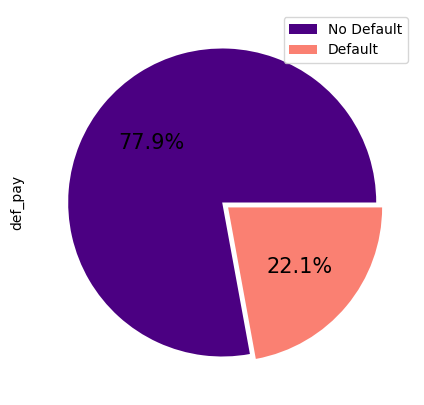

In [ ]:
# visualizing the percentage of credit card users who defaulted
plt.figure(figsize=(7,5))
perc_default = data.def_pay.sum() / len(data.def_pay)
print(f'The percentage of defaulters in the data is {perc_default*100} %')
data['def_pay'].value_counts().plot(kind='pie',labels = ['',''],autopct='%1.1f%%', colors = ['indigo','salmon'], explode = [0,0.05], textprops = {"fontsize":15})
plt.legend(labels=['No Default', 'Default'])
plt.show()

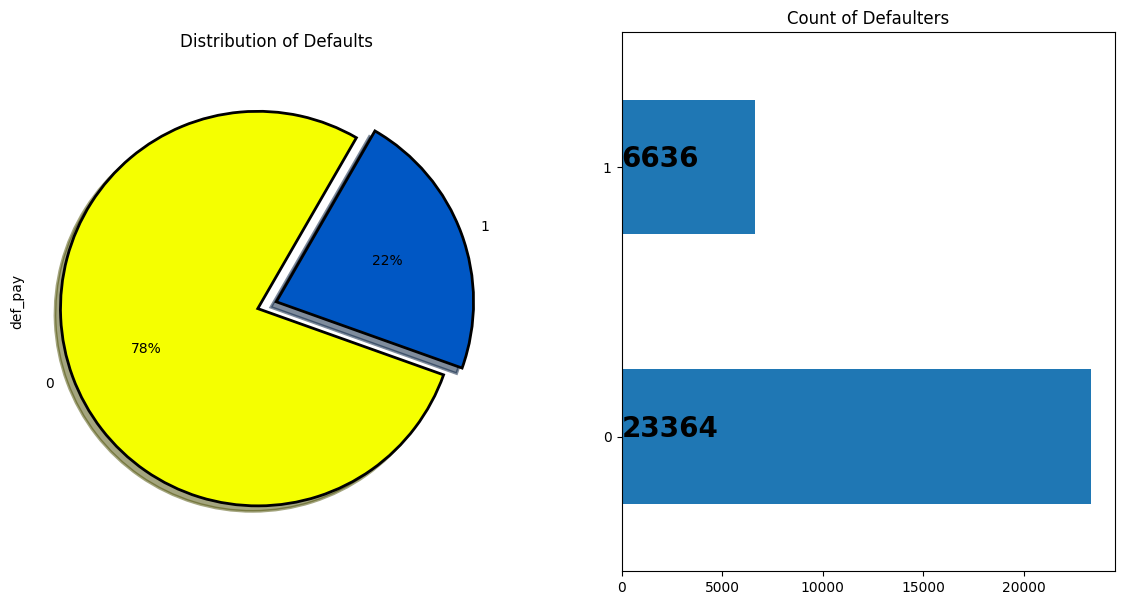

In [ ]:
# plotting to create pie chart and bar plot distribution of target variable
plt.figure(figsize=(14,7))
plt.subplot(121)
data["def_pay"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",7),startangle = 60,labels=["0","1"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0],shadow =True)
plt.title("Distribution of Defaults")

plt.subplot(122)
ax = data["def_pay"].value_counts().plot(kind="barh")

for i,j in enumerate(data["def_pay"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of Defaulters")
plt.show()

We can see that the dataset consists of 78% clients are not expected to default payment whereas 22% clients are expected to default the payment.

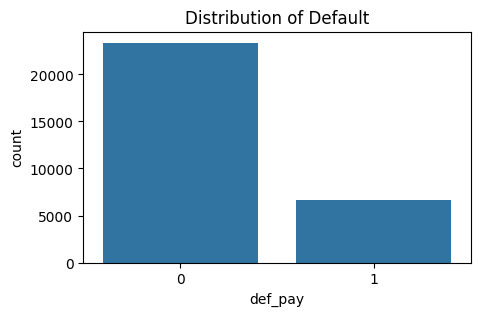

In [ ]:
# Visualizations
# Barchart
plt.figure(figsize=(5, 3))
sns.countplot(x='def_pay', data=data)
plt.title('Distribution of Default')
plt.show()

A number of 6,636 out of 30,000 (or 22%) of clients will default next month. The data has not a large unbalance with respect of the target value (def_pay).




Distribution of numerical features:


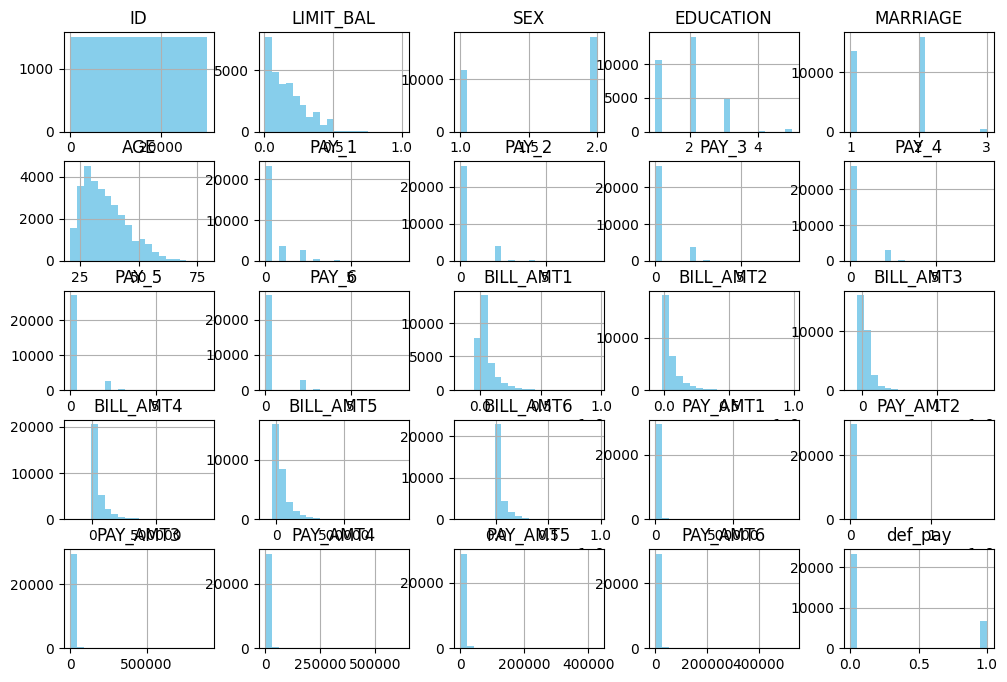

In [ ]:
# Visualize the distribution of numerical features
print("\nDistribution of numerical features:")
data.hist(bins=20, figsize=(12, 8),color='skyblue')
plt.show()

# Limit Balance


In [ ]:
# Calculate the average credit limit (LIMIT_BAL)
avg_CL= data['LIMIT_BAL'].mean()
print(f"The average credit limit: {avg_CL}")

The average credit limit: 167484.32266666667


<ipython-input-29-09d75bef9232>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['LIMIT_BAL'], kde=True, bins=200, color="blue", ax=ax1)
<ipython-input-29-09d75bef9232>:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['AGE'], kde=True, bins=30, color="green", ax=ax2)  # Adjust bins a

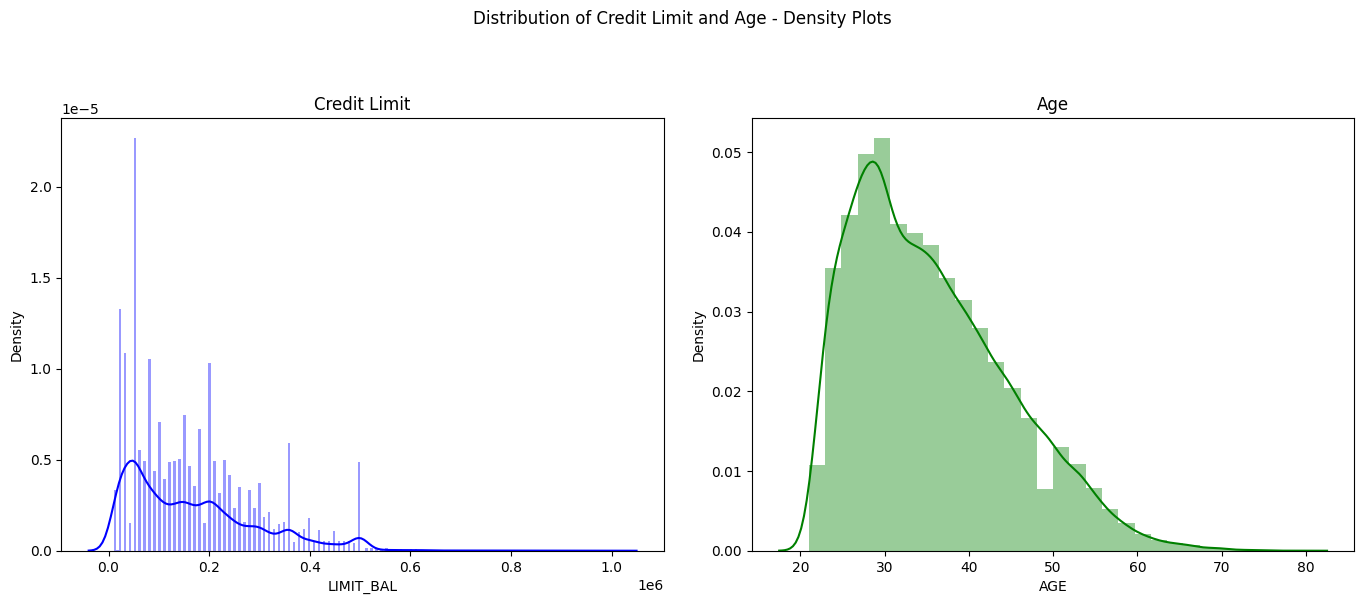

In [ ]:
# Set the size of the figure
plt.figure(figsize=(14, 6))

# Set the title of the plot
plt.suptitle('Distribution of Credit Limit and Age - Density Plots', y=1.02)

# Set seaborn color codes to "pastel"
sns.set_color_codes("pastel")

# Create a density plot with kernel density estimation (kde)
# Display the distribution of the 'LIMIT_BAL' column from the 'data' DataFrame
# Using 200 bins and setting the color to blue
ax1 = plt.subplot(1, 2, 1)
sns.distplot(data['LIMIT_BAL'], kde=True, bins=200, color="blue", ax=ax1)
ax1.set_title('Credit Limit')

# Create a density plot for the 'AGE' column
ax2 = plt.subplot(1, 2, 2)
sns.distplot(data['AGE'], kde=True, bins=30, color="green", ax=ax2)  # Adjust bins as needed
ax2.set_title('Age')

# Adjust layout for better presentation
plt.tight_layout(pad=2)

# Show the plot
plt.show()

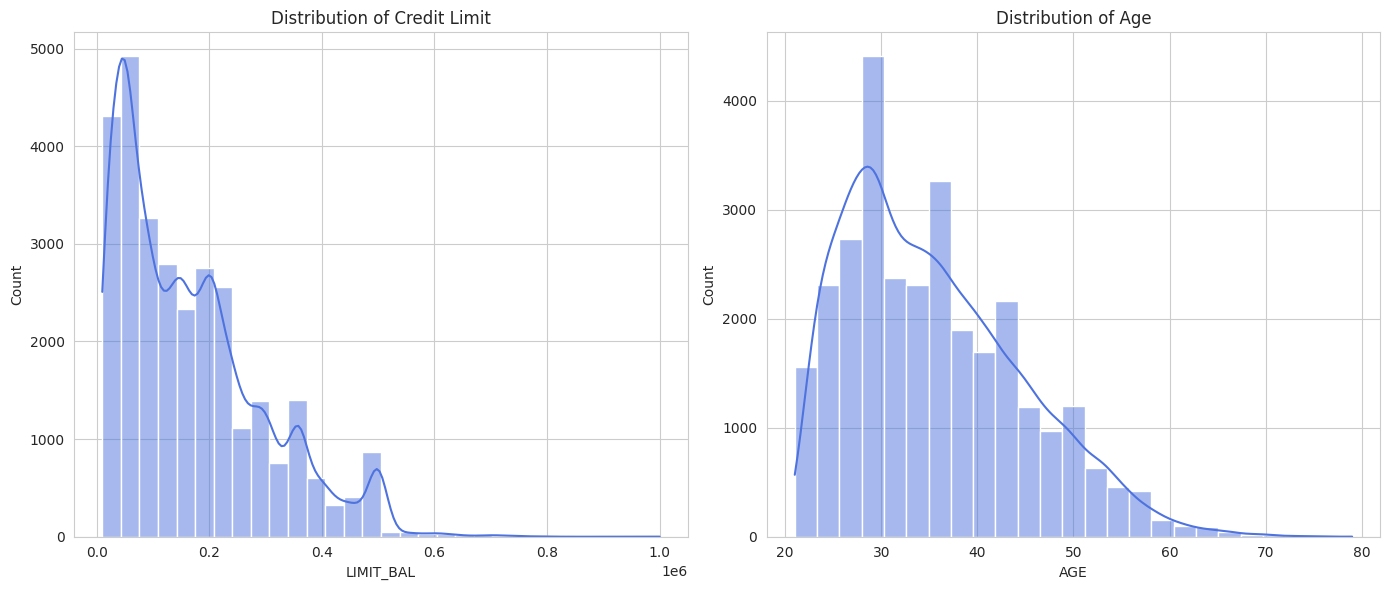

In [ ]:
# Set the style of seaborn
sns.set_style('whitegrid')

# Plotting the distribution of credit limit and age
plt.figure(figsize=(14, 6))

# Define a single color for all plots
uniform_color = '#4e73df'

# Distribution of credit limit
plt.subplot(1, 2, 1)
sns.histplot(data['LIMIT_BAL'], bins=30, kde=True, color=uniform_color)
plt.title('Distribution of Credit Limit')

# Distribution of age
plt.subplot(1, 2, 2)
sns.histplot(data['AGE'], bins=25, kde=True, color=uniform_color)
plt.title('Distribution of Age')

plt.tight_layout()
plt.show()

By plotting the continous variables we observe that dataset consists of skewed data of limiting balance and age of clients. We have more number of clients having limiting balance between 0 to 200000 currency. We have more number of clients from age bracket of 20 to 40, i.e., clients from mostly young to mid aged groups.

# Demographic Search

## Education

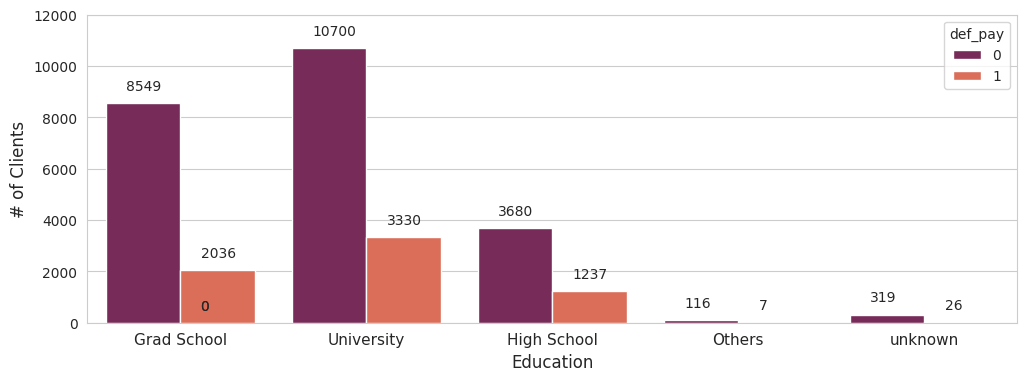

In [ ]:
plt.figure(figsize=(12, 4))

ax = sns.countplot(data=data, x='EDUCATION', hue='def_pay', palette='rocket')

plt.xlabel("Education", fontsize=12)
plt.ylabel("# of Clients", fontsize=12)
plt.ylim(0, 12000)
plt.xticks([0, 1, 2, 3, 4], ['Grad School', 'University', 'High School', 'Others', 'unknown'], fontsize=11)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.11, p.get_height() + 500))

plt.show()

<ipython-input-32-9e72c6f5e119>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x = "EDUCATION", y = "def_pay", data = data, palette = 'rocket', ci = None)
<ipython-input-32-9e72c6f5e119>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = "EDUCATION", y = "def_pay", data = data, palette = 'rocket', ci = None)


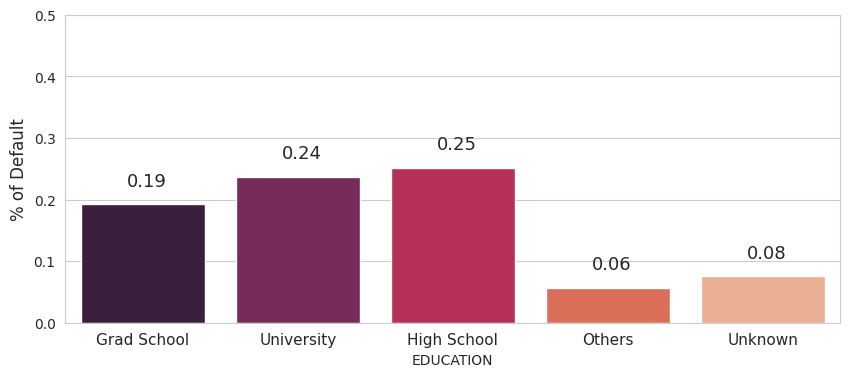

In [ ]:
plt.figure(figsize=(10,4))

ax = sns.barplot(x = "EDUCATION", y = "def_pay", data = data, palette = 'rocket', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2,3,4],['Grad School','University','High School','Others','Unknown'], fontsize = 11)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03),fontsize=13)

plt.show()

The predominant level of education in our dataset is 'University', followed by 'Grad School', 'High School', 'Unknown' and 'Others'.

Considering only the first three levels, it seems that a higher education translates to a lower chance of default. However, both 'Unknown' and 'Others' (which we would presume that it means a lower level than high school), have a noticeably lower probability.

## Marital Status

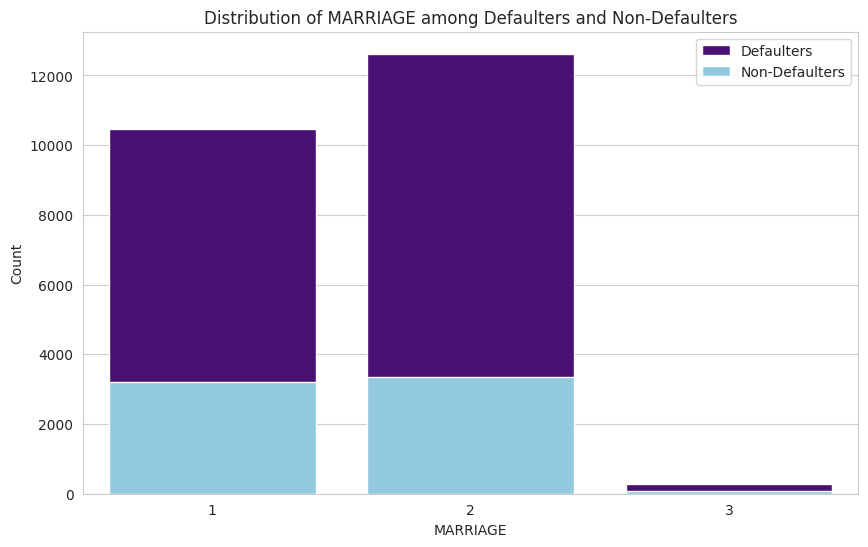

In [ ]:
defaulters = data[data['def_pay'] == 0]
non_defaulters = data[data['def_pay'] == 1]

# Count the occurrences of each martial status for defaulters and non-defaulters
defaulter_martial_status_counts = defaulters['MARRIAGE'].value_counts()
non_defaulter_martial_status_counts = non_defaulters['MARRIAGE'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=defaulter_martial_status_counts.index, y=defaulter_martial_status_counts.values, label='Defaulters', color='indigo')
sns.barplot(x=non_defaulter_martial_status_counts.index, y=non_defaulter_martial_status_counts.values, label='Non-Defaulters', color='skyblue')

plt.title('Distribution of MARRIAGE among Defaulters and Non-Defaulters')
plt.xlabel('MARRIAGE')
plt.ylabel('Count')
plt.legend()
plt.show()

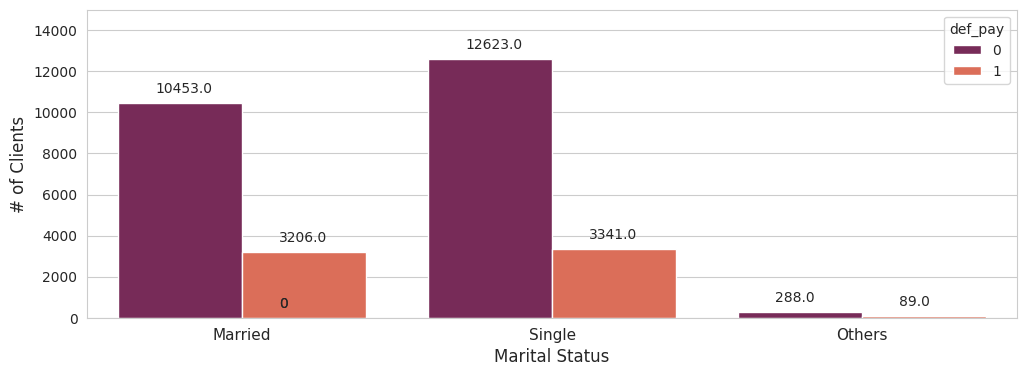

In [ ]:
plt.figure(figsize=(12,4))

ax = sns.countplot(data = data, x = 'MARRIAGE', hue="def_pay", palette = 'rocket')

plt.xlabel("Marital Status", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,15000)
plt.xticks([0,1,2],['Married', 'Single', 'Others'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.12, p.get_height()+500))

plt.show()

<ipython-input-35-393a5ae44e22>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x = "MARRIAGE", y = "def_pay", data = data, palette = 'rocket', ci = None)
<ipython-input-35-393a5ae44e22>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = "MARRIAGE", y = "def_pay", data = data, palette = 'rocket', ci = None)


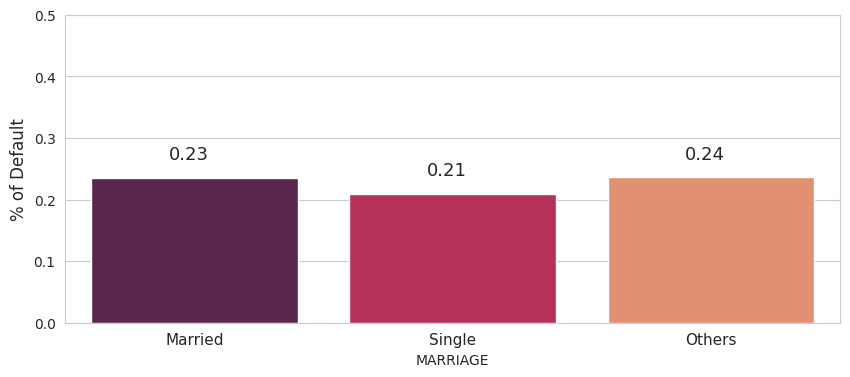

In [ ]:
plt.figure(figsize=(10,4))

ax = sns.barplot(x = "MARRIAGE", y = "def_pay", data = data, palette = 'rocket', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2],['Married', 'Single', 'Others'], fontsize = 11)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03),fontsize=13)

plt.show()

Comparing all, 'Others' category presents a higher probability of default. Among the rest, those who are single have a slight lower chance of default, while the people who got married or divorced are more likely to default.

## Age

In [ ]:
# Calculate average age of crredit card holders
avg_age= data['AGE'].mean()
print(f"The average age of credit card users: {avg_age}")

The average age of credit card users: 35.4855


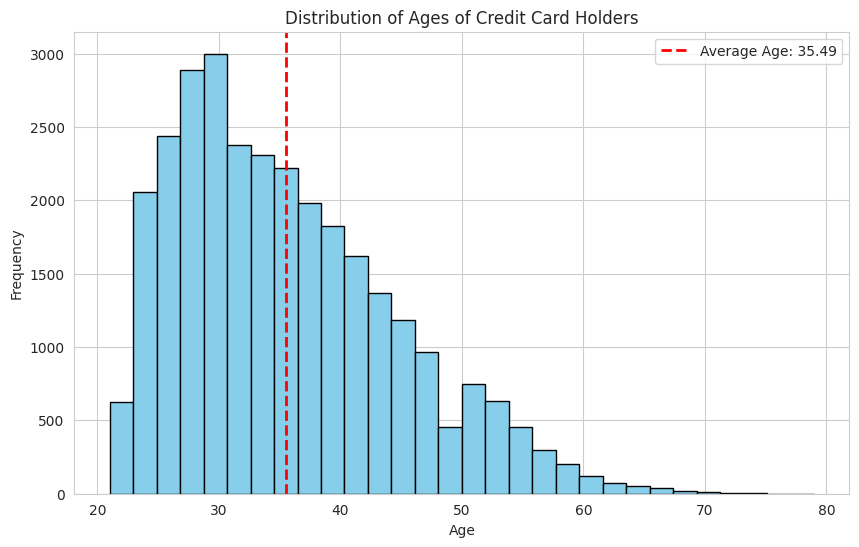

In [ ]:
# Calculate average age of credit card holders
avg_age = data['AGE'].mean()

# Create a histogram of ages
plt.figure(figsize=(10, 6))
plt.hist(data['AGE'], bins=30, color='skyblue', edgecolor='black')

# Add a vertical line for the average age
plt.axvline(avg_age, color='red', linestyle='dashed', linewidth=2, label=f'Average Age: {avg_age:.2f}')

plt.title('Distribution of Ages of Credit Card Holders')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()


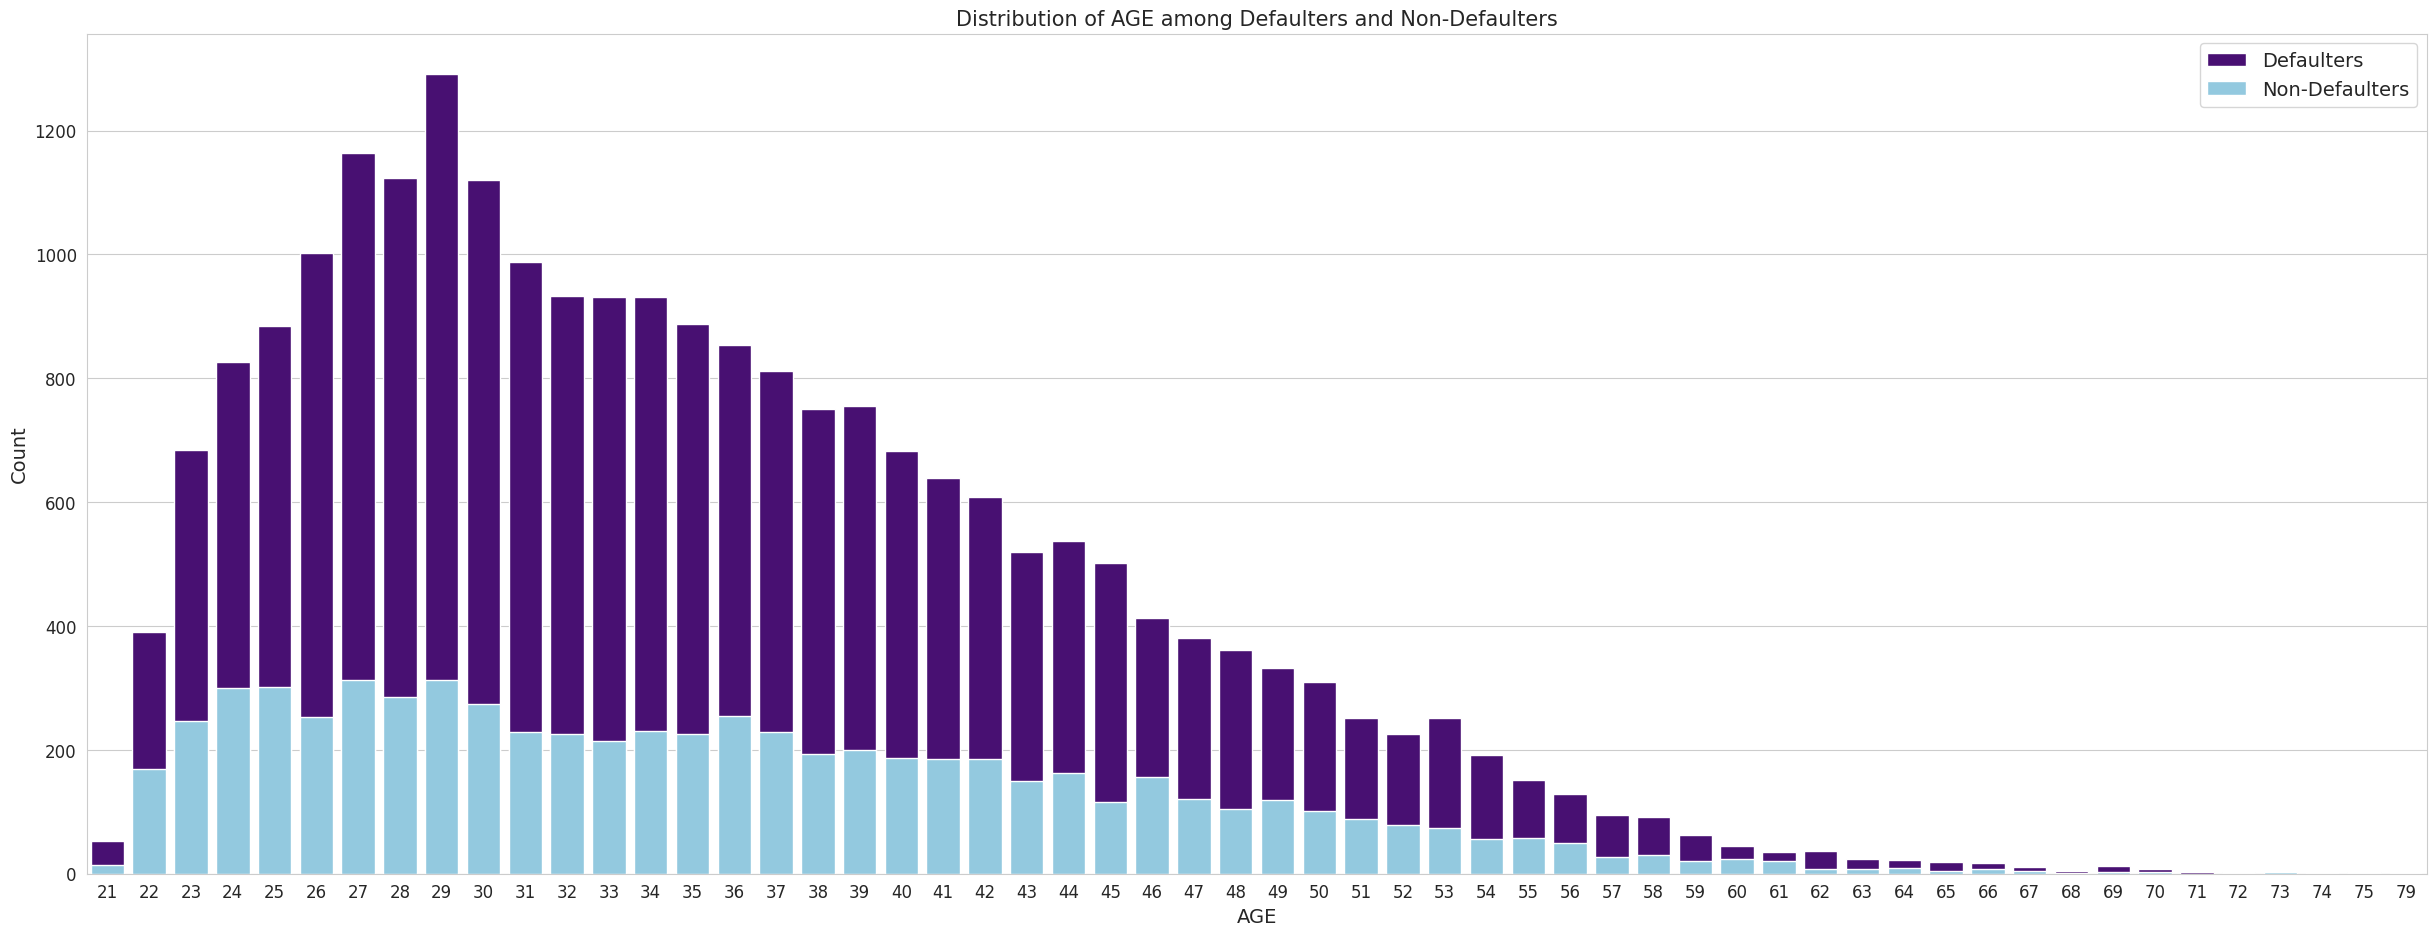

In [ ]:
defaulters = data[data['def_pay'] == 0]
non_defaulters = data[data['def_pay'] == 1]

# Count the occurrences of each martial status for defaulters and non-defaulters
defaulter_age_counts = defaulters['AGE'].value_counts()
non_defaulter_age_counts = non_defaulters['AGE'].value_counts()

# Create a bar chart
plt.figure(figsize=(25, 10))

# Use sns.barplot for Defaulters
sns.barplot(x=defaulter_age_counts.index, y=defaulter_age_counts.values, label='Defaulters', color='indigo')

# Use sns.barplot for Non-Defaulters
sns.barplot(x=non_defaulter_age_counts.index, y=non_defaulter_age_counts.values, label='Non-Defaulters', color='skyblue')

# Adjust label sizes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Set title and axis labels
plt.title('Distribution of AGE among Defaulters and Non-Defaulters', fontsize=15)
plt.xlabel('AGE', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add legend and adjust legend font size
plt.legend(fontsize=14)

# Adjust layout pad for better visibility of labels
plt.tight_layout(pad=3)

# Show the plot
plt.show()

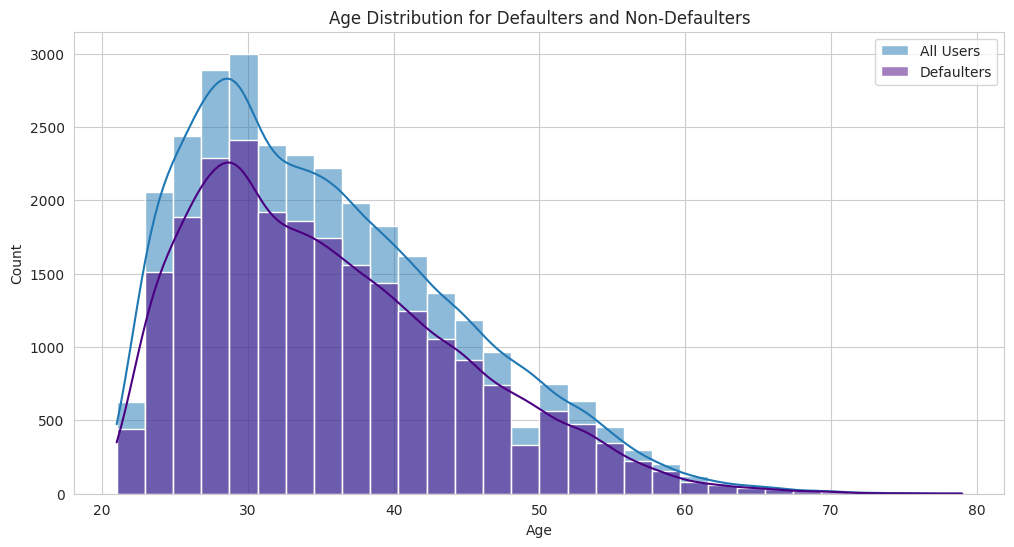

In [ ]:
# Assuming 'df' is your DataFrame containing the credit card data
# Replace 'default.payment next month' with a valid column name if needed
defaulters = data[data['def_pay'] == 0]
non_defaulters = data[data['def_pay'] == 1]

# Example visualization for Age distribution
plt.figure(figsize=(12, 6))
sns.histplot(data['AGE'], bins=30, kde=True, label='All Users')
sns.histplot(defaulters['AGE'], bins=30, kde=True, color='indigo', label='Defaulters')
plt.title('Age Distribution for Defaulters and Non-Defaulters')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

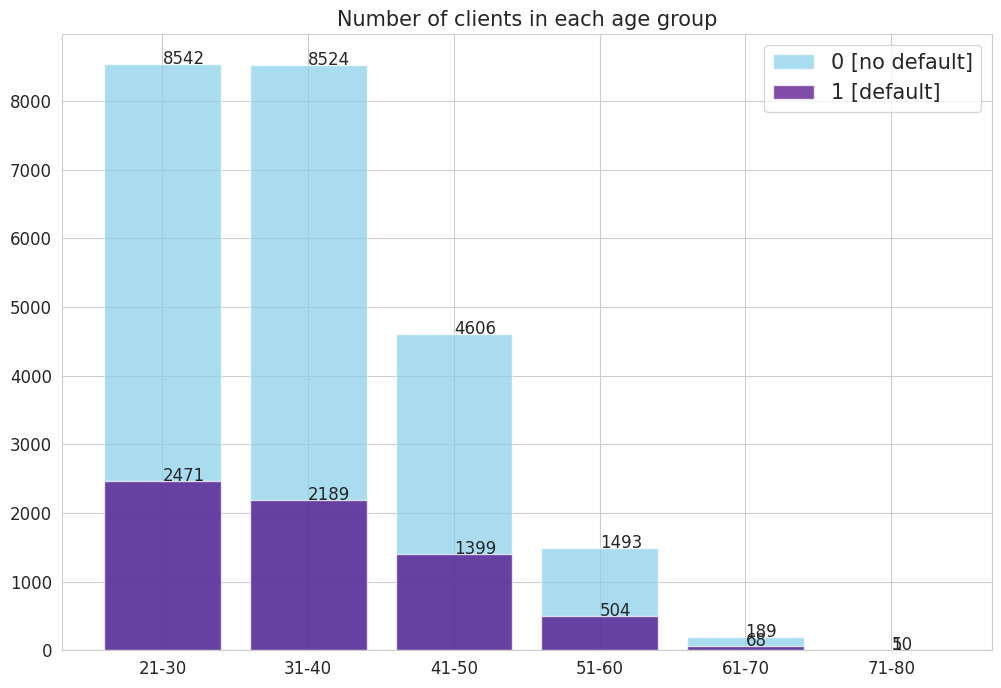

In [ ]:
# Define age bins and labels
bins = [20, 30, 40, 50, 60, 70, 80]
names = ['21-30', '31-40', '41-50', '51-60', '61-70', '71-80']

# Create a new column 'AGE_BIN' based on age bins
data['AGE_BIN'] = pd.cut(x=data.AGE, bins=bins, labels=names, right=True)

# Count the occurrences of each age bin
age_cnt = data.AGE_BIN.value_counts()

# Count the occurrences of each age bin for defaulters (def_pay == 1) and non-defaulters (def_pay == 0)
age_0 = data[data['def_pay'] == 0]['AGE_BIN'].value_counts()
age_1 = data[data['def_pay'] == 1]['AGE_BIN'].value_counts()

# Create a bar plot to visualize the number of clients in each age group based on default status
plt.subplots(figsize=(12, 8))
plt.bar(age_0.index, age_0.values, label='0 [no default]', color='skyblue',alpha=0.7)
plt.bar(age_1.index, age_1.values, label='1 [default]', color='indigo', alpha=0.7)  # Adding alpha for transparency

# Add text labels for each bar
for x, y in zip(names, age_0):
    plt.text(x, y, y, fontsize=12)
for x, y in zip(names, age_1):
    plt.text(x, y, y, fontsize=12)

# Set axis labels and title
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of clients in each age group", fontsize=15)

# Add legend
plt.legend(loc='upper right', fontsize=15)

# Show the plot
plt.show()

We have maximum clients from 21-30 age group followed by 31-40. Hence with


increasing age group the number of clients that will default the payment next month is decreasing. Hence we can see that Age is important feature to predict the default payment for next month.

## Repayment Status

In [ ]:
# Calculate the distribution of repayment status from PAY_0 to PAY_6
data[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].apply(lambda x: x.value_counts().sort_index())

PAY_1  PAY_2  PAY_3  PAY_4    PAY_5    PAY_6
0  23182  25562  25787  26490  27032.0  26921.0
1   3688     28      4      2      NaN      NaN
2   2667   3927   3819   3159   2626.0   2766.0
3    322    326    240    180    178.0    184.0
4     76     99     76     69     84.0     49.0
5     26     25     21     35     17.0     13.0
6     11     12     23      5      4.0     19.0
7      9     20     27     58     58.0     46.0
8     19      1      3      2      1.0      2.0

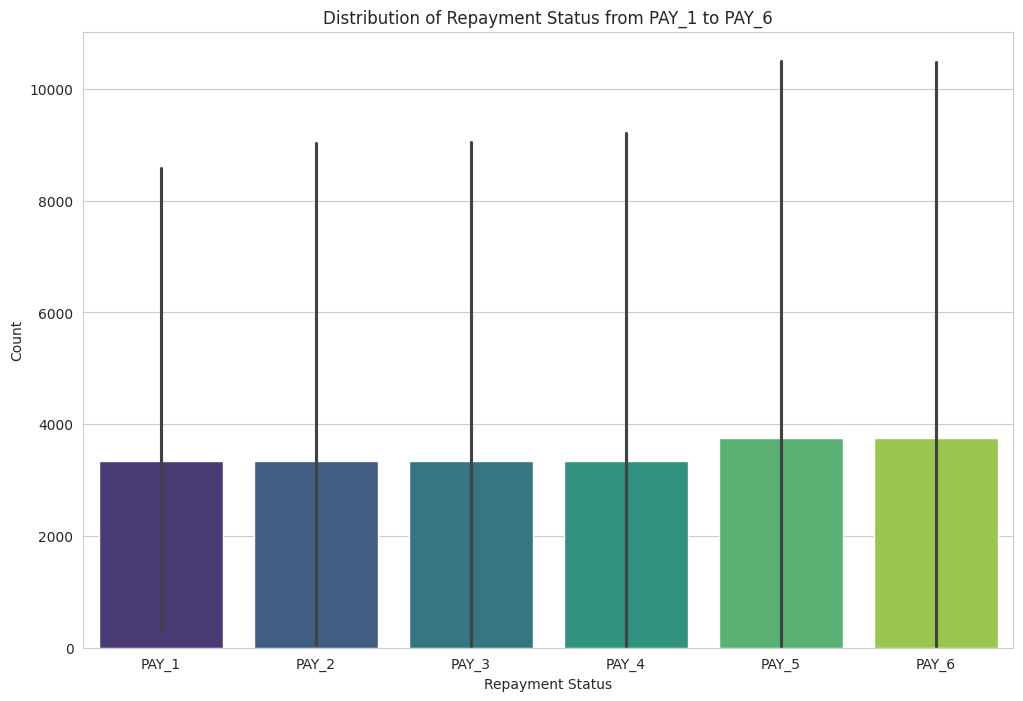

In [ ]:
# Select relevant columns for repayment status
repayment_status_columns = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
subset_df = data[repayment_status_columns]

# Calculate the distribution of repayment status for each month
value_counts_df = subset_df.apply(lambda x: x.value_counts().sort_index())

# Create a bar plot using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=value_counts_df, palette='viridis')
plt.title('Distribution of Repayment Status from PAY_1 to PAY_6')
plt.xlabel('Repayment Status')
plt.ylabel('Count')
plt.show()

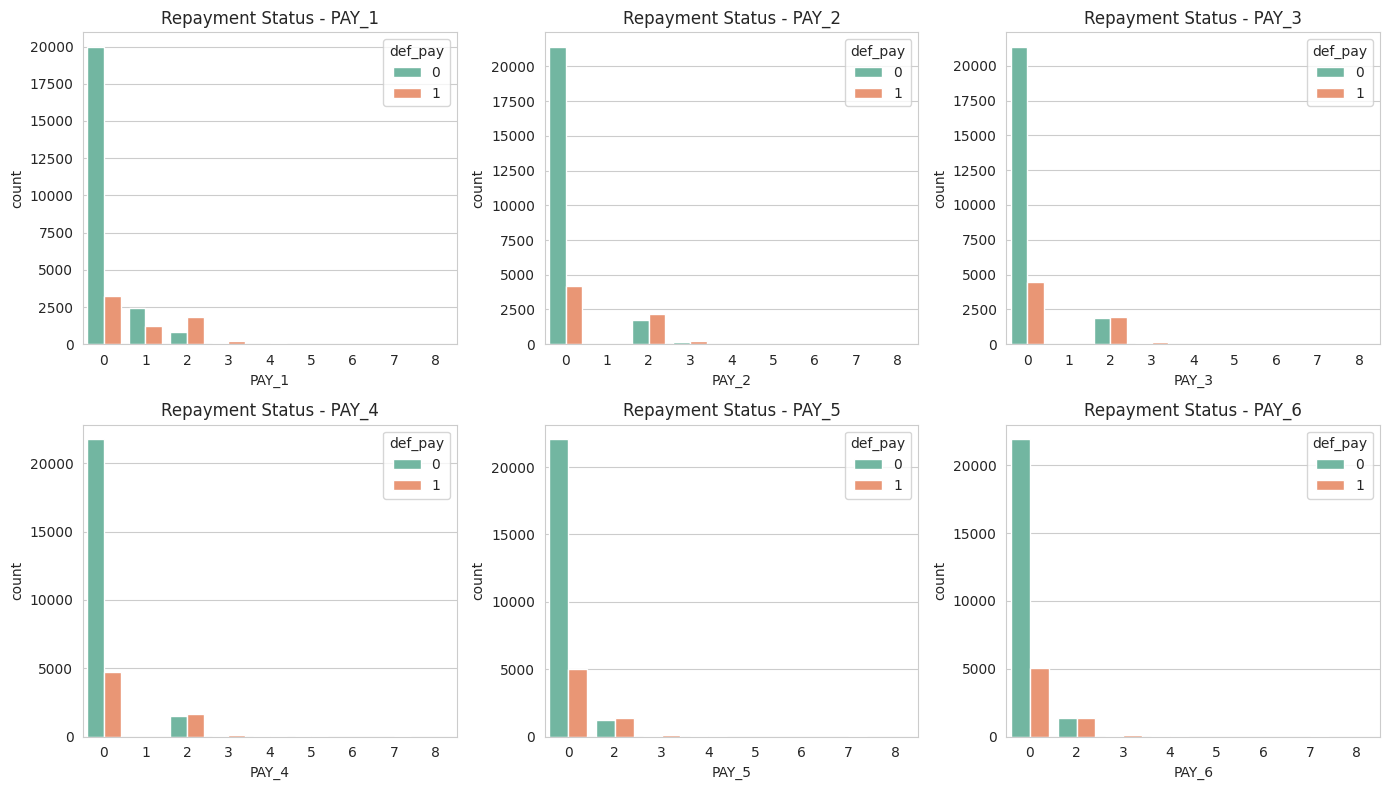

In [ ]:
# Visualization of Repayment Status over Different Months
repayment_status_columns = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
plt.figure(figsize=(14, 8))

for column in repayment_status_columns:
    plt.subplot(2, 3, repayment_status_columns.index(column) + 1)
    sns.countplot(x=column, data=data, hue='def_pay', palette='Set2')
    plt.title(f'Repayment Status - {column}')

plt.tight_layout()
plt.show()

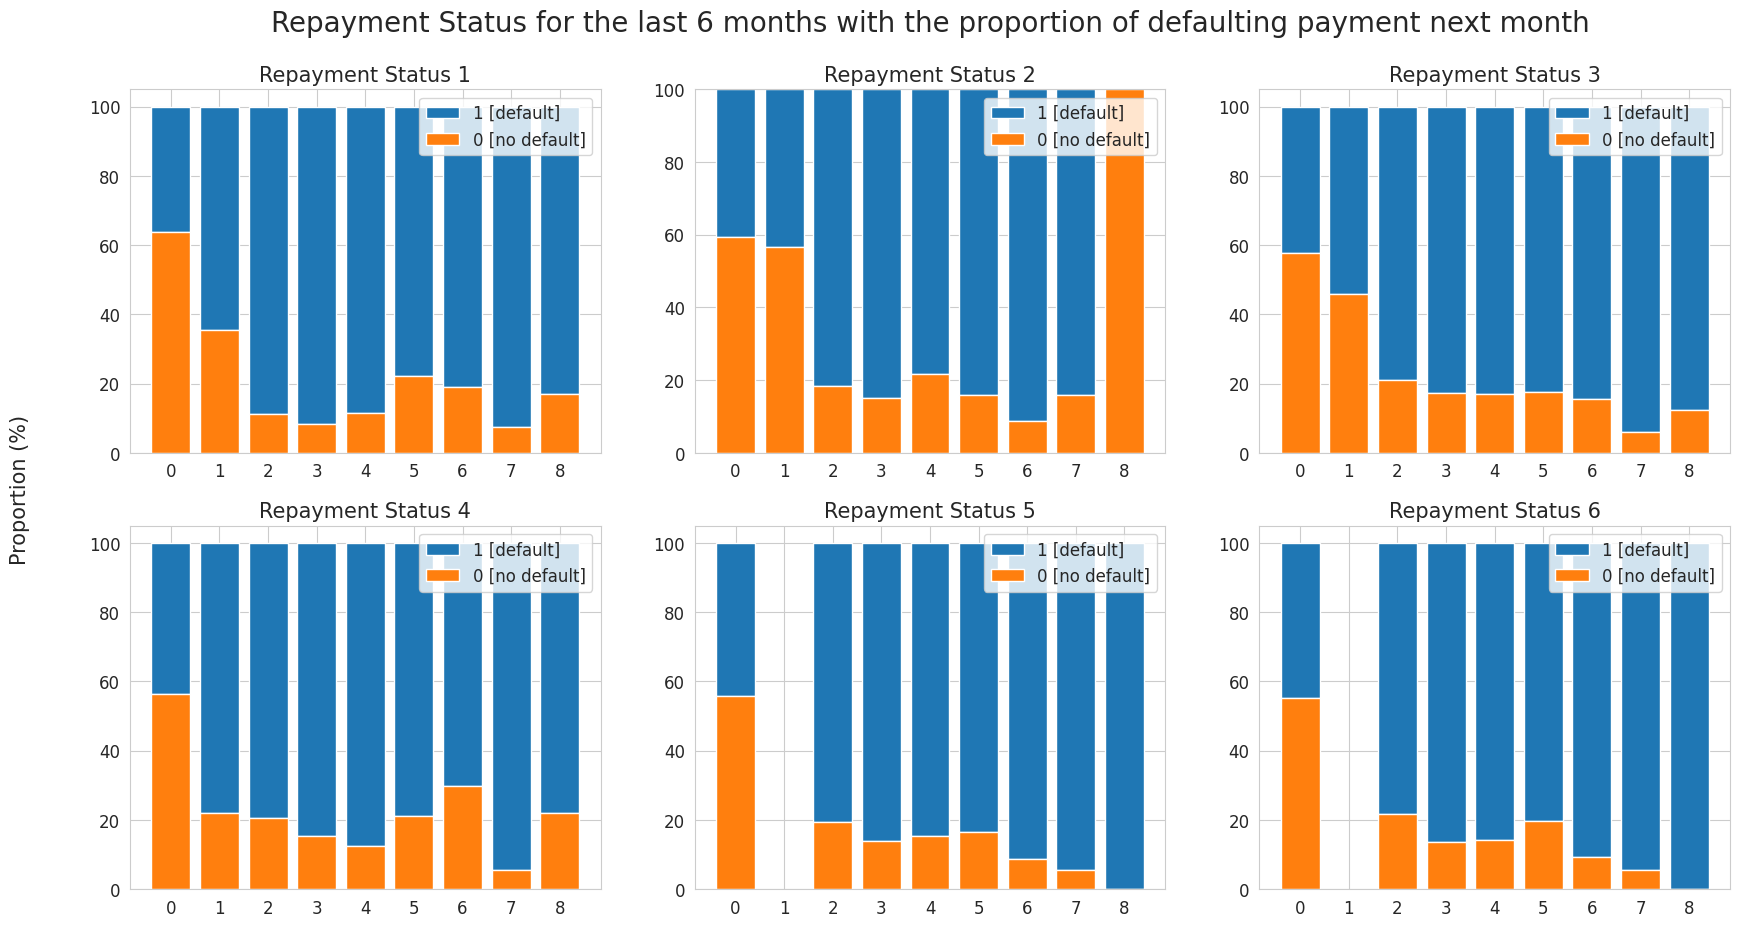

In [ ]:
# Set the figure size
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# List of unique values for each PAY_X column
pay_columns = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Loop through each PAY_X column
for i, column in enumerate(pay_columns):
    row, col = divmod(i, 3)  # Calculate the row and column for the subplot
    ax = axes[row, col]  # Select the current subplot

    # Get unique values for the current PAY_X column
    ind = sorted(data[column].unique())

    # Calculate proportions for default and no-default for the current PAY_X column
    pay_0 = data[column][data['def_pay'] == 0].value_counts(normalize=True).reindex(ind, fill_value=0)
    pay_1 = data[column][data['def_pay'] == 1].value_counts(normalize=True).reindex(ind, fill_value=0)

    total = pay_0.values + pay_1.values
    pay_0_prop = np.true_divide(pay_0, total) * 100
    pay_1_prop = np.true_divide(pay_1, total) * 100

    # Plot the stacked bar chart
    ax.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1 [default]')
    ax.bar(ind, pay_0_prop, label='0 [no default]')

    # Set title and labels
    ax.set_title(f"Repayment Status {column[-1]}", fontsize=15)

# Set common x-axis labels and adjust layout
for ax in axes.flat:
    ax.set_xticks(sorted(data.PAY_1.unique()))
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.legend(loc="upper right", fontsize=12)

# Set common y-axis label and adjust layout
fig.text(0.04, 0.5, 'Proportion (%)', va='center', rotation='vertical', fontsize=15)

# Set main title
plt.suptitle("Repayment Status for the last 6 months with the proportion of defaulting payment next month", fontsize=20)

# Adjust layout to provide more space for y-axis label
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Show the plot
plt.show()

Above plot shows us the proportion of clients that will default payment next month based on repayment history.
For Current month status, the earlier the payment is made lesser are the chances of those clients defaulting the payment.

In [ ]:
from tqdm.notebook import tqdm

tqdm.pandas()

# Calculate the average bill amount for BILL_AMT1 to BILL_AMT6
avg_bill_amounts = data[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean()

# Calculate the average amount of previous payment for PAY_AMT1 to PAY_AMT6
avg_pay_amounts = data[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].mean()


# Output the results
print('Average bill amounts from BILL_AMT1 to BILL_AMT6:')
print(avg_bill_amounts)
print('\nAverage amount of previous payment from PAY_AMT1 to PAY_AMT6:')
print(avg_pay_amounts)

Average bill amounts from BILL_AMT1 to BILL_AMT6:
BILL_AMT1    51223.330900
BILL_AMT2    49179.075167
BILL_AMT3    47013.154800
BILL_AMT4    43262.948967
BILL_AMT5    40311.400967
BILL_AMT6    38871.760400
dtype: float64

Average amount of previous payment from PAY_AMT1 to PAY_AMT6:
PAY_AMT1    5663.580500
PAY_AMT2    5921.163500
PAY_AMT3    5225.681500
PAY_AMT4    4826.076867
PAY_AMT5    4799.387633
PAY_AMT6    5215.502567
dtype: float64


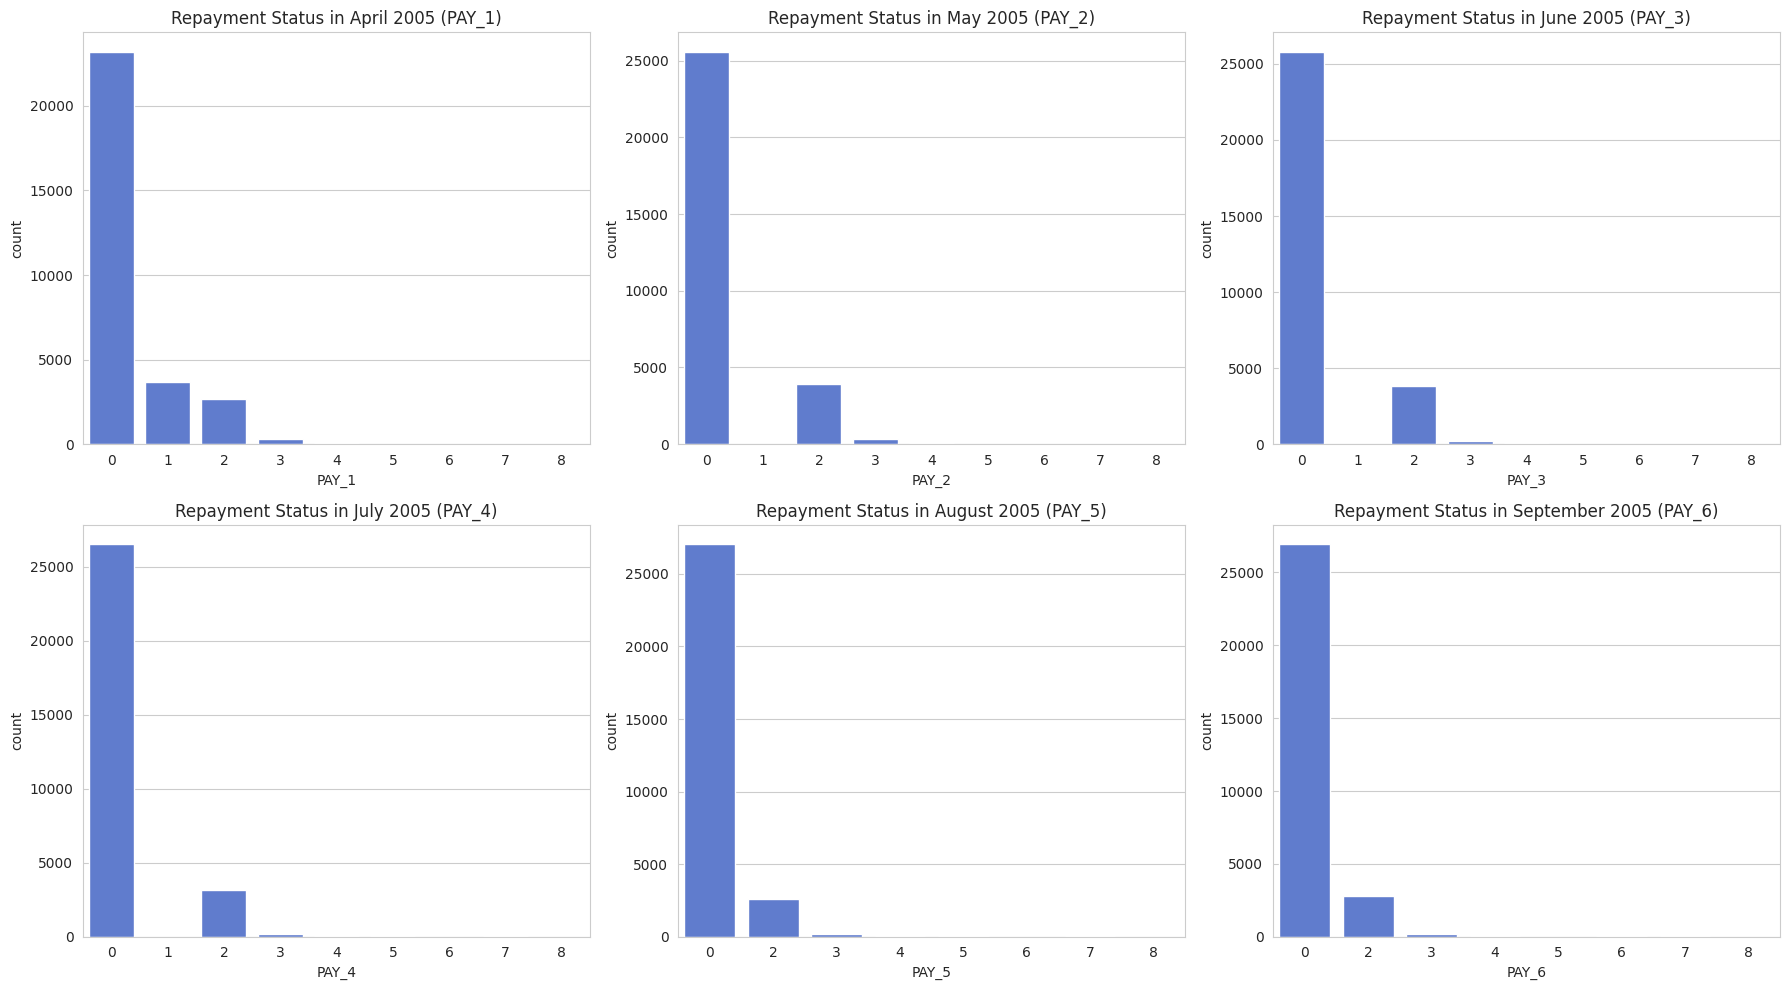

In [ ]:
# Set the style of seaborn
sns.set_style('whitegrid')

# Plotting the distribution of repayment status for the months April to September 2005
plt.figure(figsize=(18, 10))

# Define a single color for all plots
uniform_color = '#4e73df'
# Repayment status in April 2005
plt.subplot(2, 3, 1)
sns.countplot(x='PAY_1', data=data, color=uniform_color)
plt.title('Repayment Status in April 2005 (PAY_1)')

# Repayment status in May 2005
plt.subplot(2, 3, 2)
sns.countplot(x='PAY_2', data=data, color=uniform_color)
plt.title('Repayment Status in May 2005 (PAY_2)')

# Repayment status in June 2005
plt.subplot(2, 3, 3)
sns.countplot(x='PAY_3', data=data, color=uniform_color)
plt.title('Repayment Status in June 2005 (PAY_3)')

# Repayment status in July 2005
plt.subplot(2, 3, 4)
sns.countplot(x='PAY_4', data=data, color=uniform_color)
plt.title('Repayment Status in July 2005 (PAY_4)')

# Repayment status in August 2005
plt.subplot(2, 3, 5)
sns.countplot(x='PAY_5', data=data, color=uniform_color)
plt.title('Repayment Status in August 2005 (PAY_5)')

# Repayment status in September 2005
plt.subplot(2, 3, 6)
sns.countplot(x='PAY_6', data=data, color=uniform_color)
plt.title('Repayment Status in September 2005 (PAY_6)')

plt.tight_layout()
plt.show()

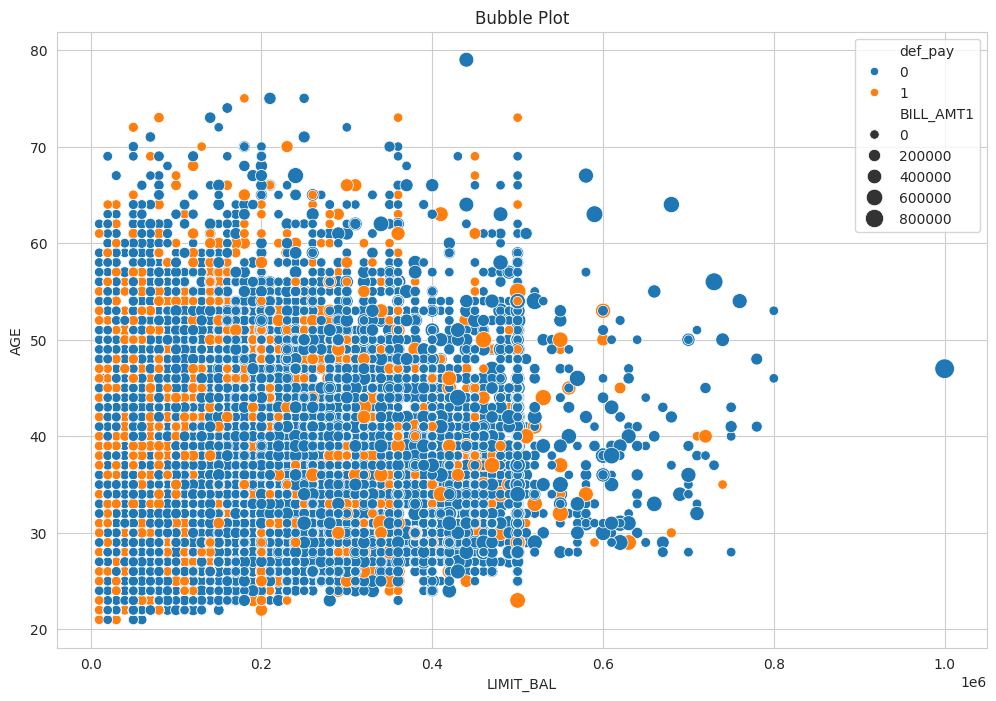

In [ ]:
# Bubble plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='LIMIT_BAL', y='AGE', hue='def_pay', data=data, size='BILL_AMT1', sizes=(20, 200))
plt.title('Bubble Plot')
plt.show()

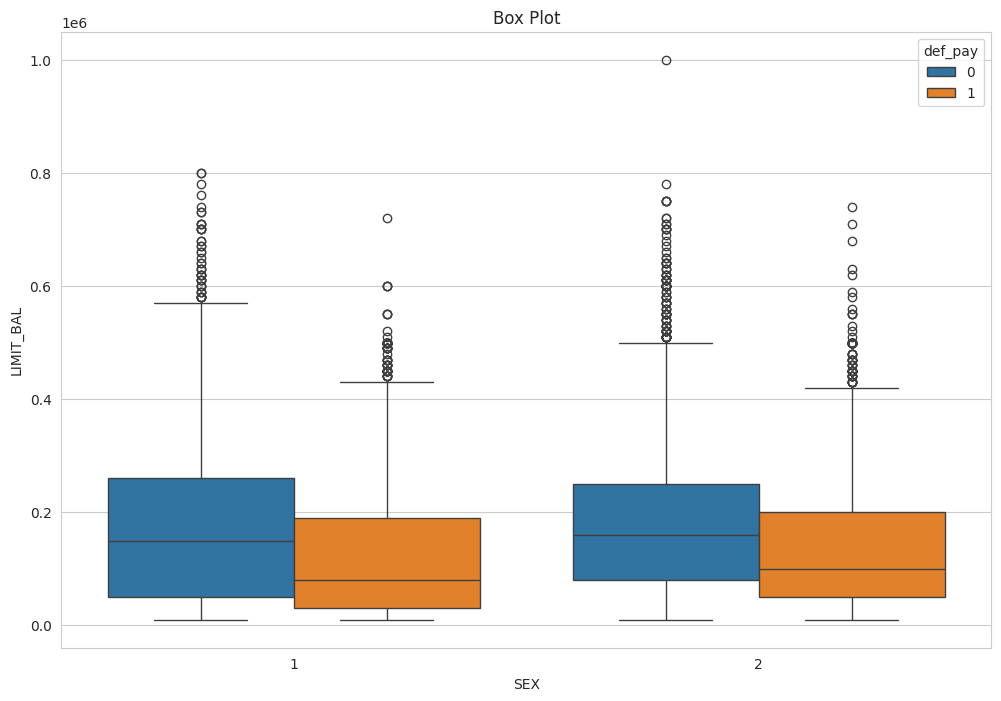

In [ ]:
# Box Plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='SEX', y='LIMIT_BAL', hue='def_pay', data=data)
plt.title('Box Plot')
plt.show()

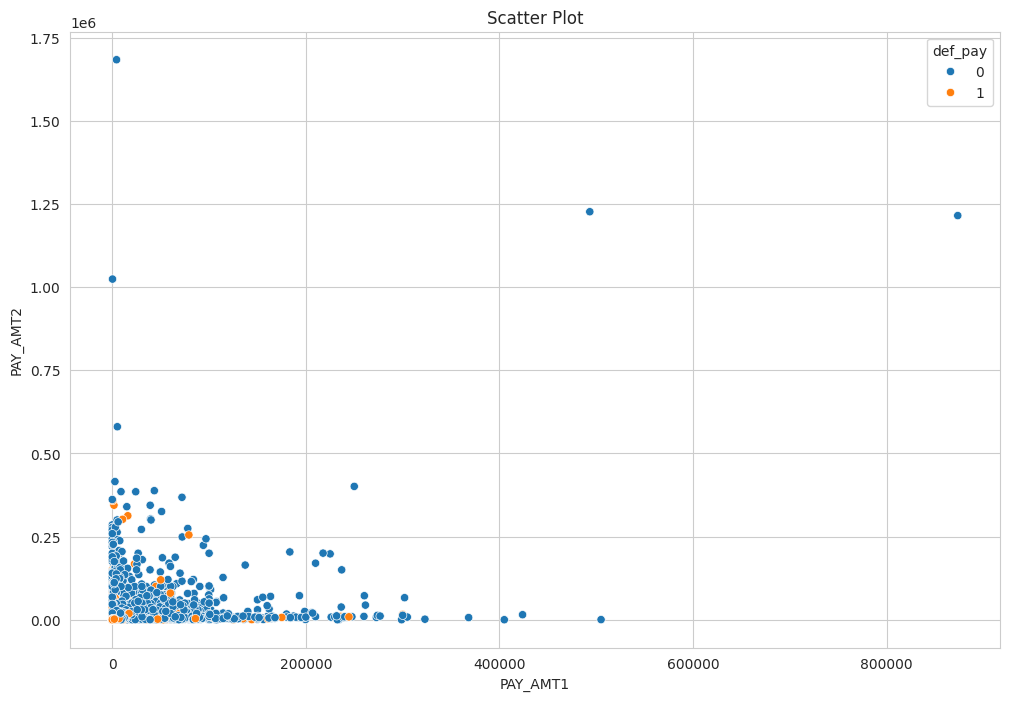

In [ ]:
# Scatter Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PAY_AMT1', y='PAY_AMT2', hue='def_pay', data=data)
plt.title('Scatter Plot')
plt.show()

### Outlier Detection

In [ ]:
print(data.dtypes)

ID              int64
LIMIT_BAL     float64
SEX             int64
EDUCATION       int64
MARRIAGE        int64
AGE             int64
PAY_1           int64
PAY_2           int64
PAY_3           int64
PAY_4           int64
PAY_5           int64
PAY_6           int64
BILL_AMT1     float64
BILL_AMT2     float64
BILL_AMT3     float64
BILL_AMT4     float64
BILL_AMT5     float64
BILL_AMT6     float64
PAY_AMT1      float64
PAY_AMT2      float64
PAY_AMT3      float64
PAY_AMT4      float64
PAY_AMT5      float64
PAY_AMT6      float64
def_pay         int64
AGE_BIN      category
dtype: object


In [ ]:
# Check for any anomalies in numerical variables
# We will look for negative values
data[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4','PAY_5','PAY_6','PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].apply(lambda x: (x < 0).sum())

BILL_AMT1    590
BILL_AMT2    669
BILL_AMT3    655
BILL_AMT4    675
BILL_AMT5    655
BILL_AMT6    688
PAY_1          0
PAY_2          0
PAY_3          0
PAY_4          0
PAY_5          0
PAY_6          0
PAY_AMT1       0
PAY_AMT2       0
PAY_AMT3       0
PAY_AMT4       0
PAY_AMT5       0
PAY_AMT6       0
dtype: int64

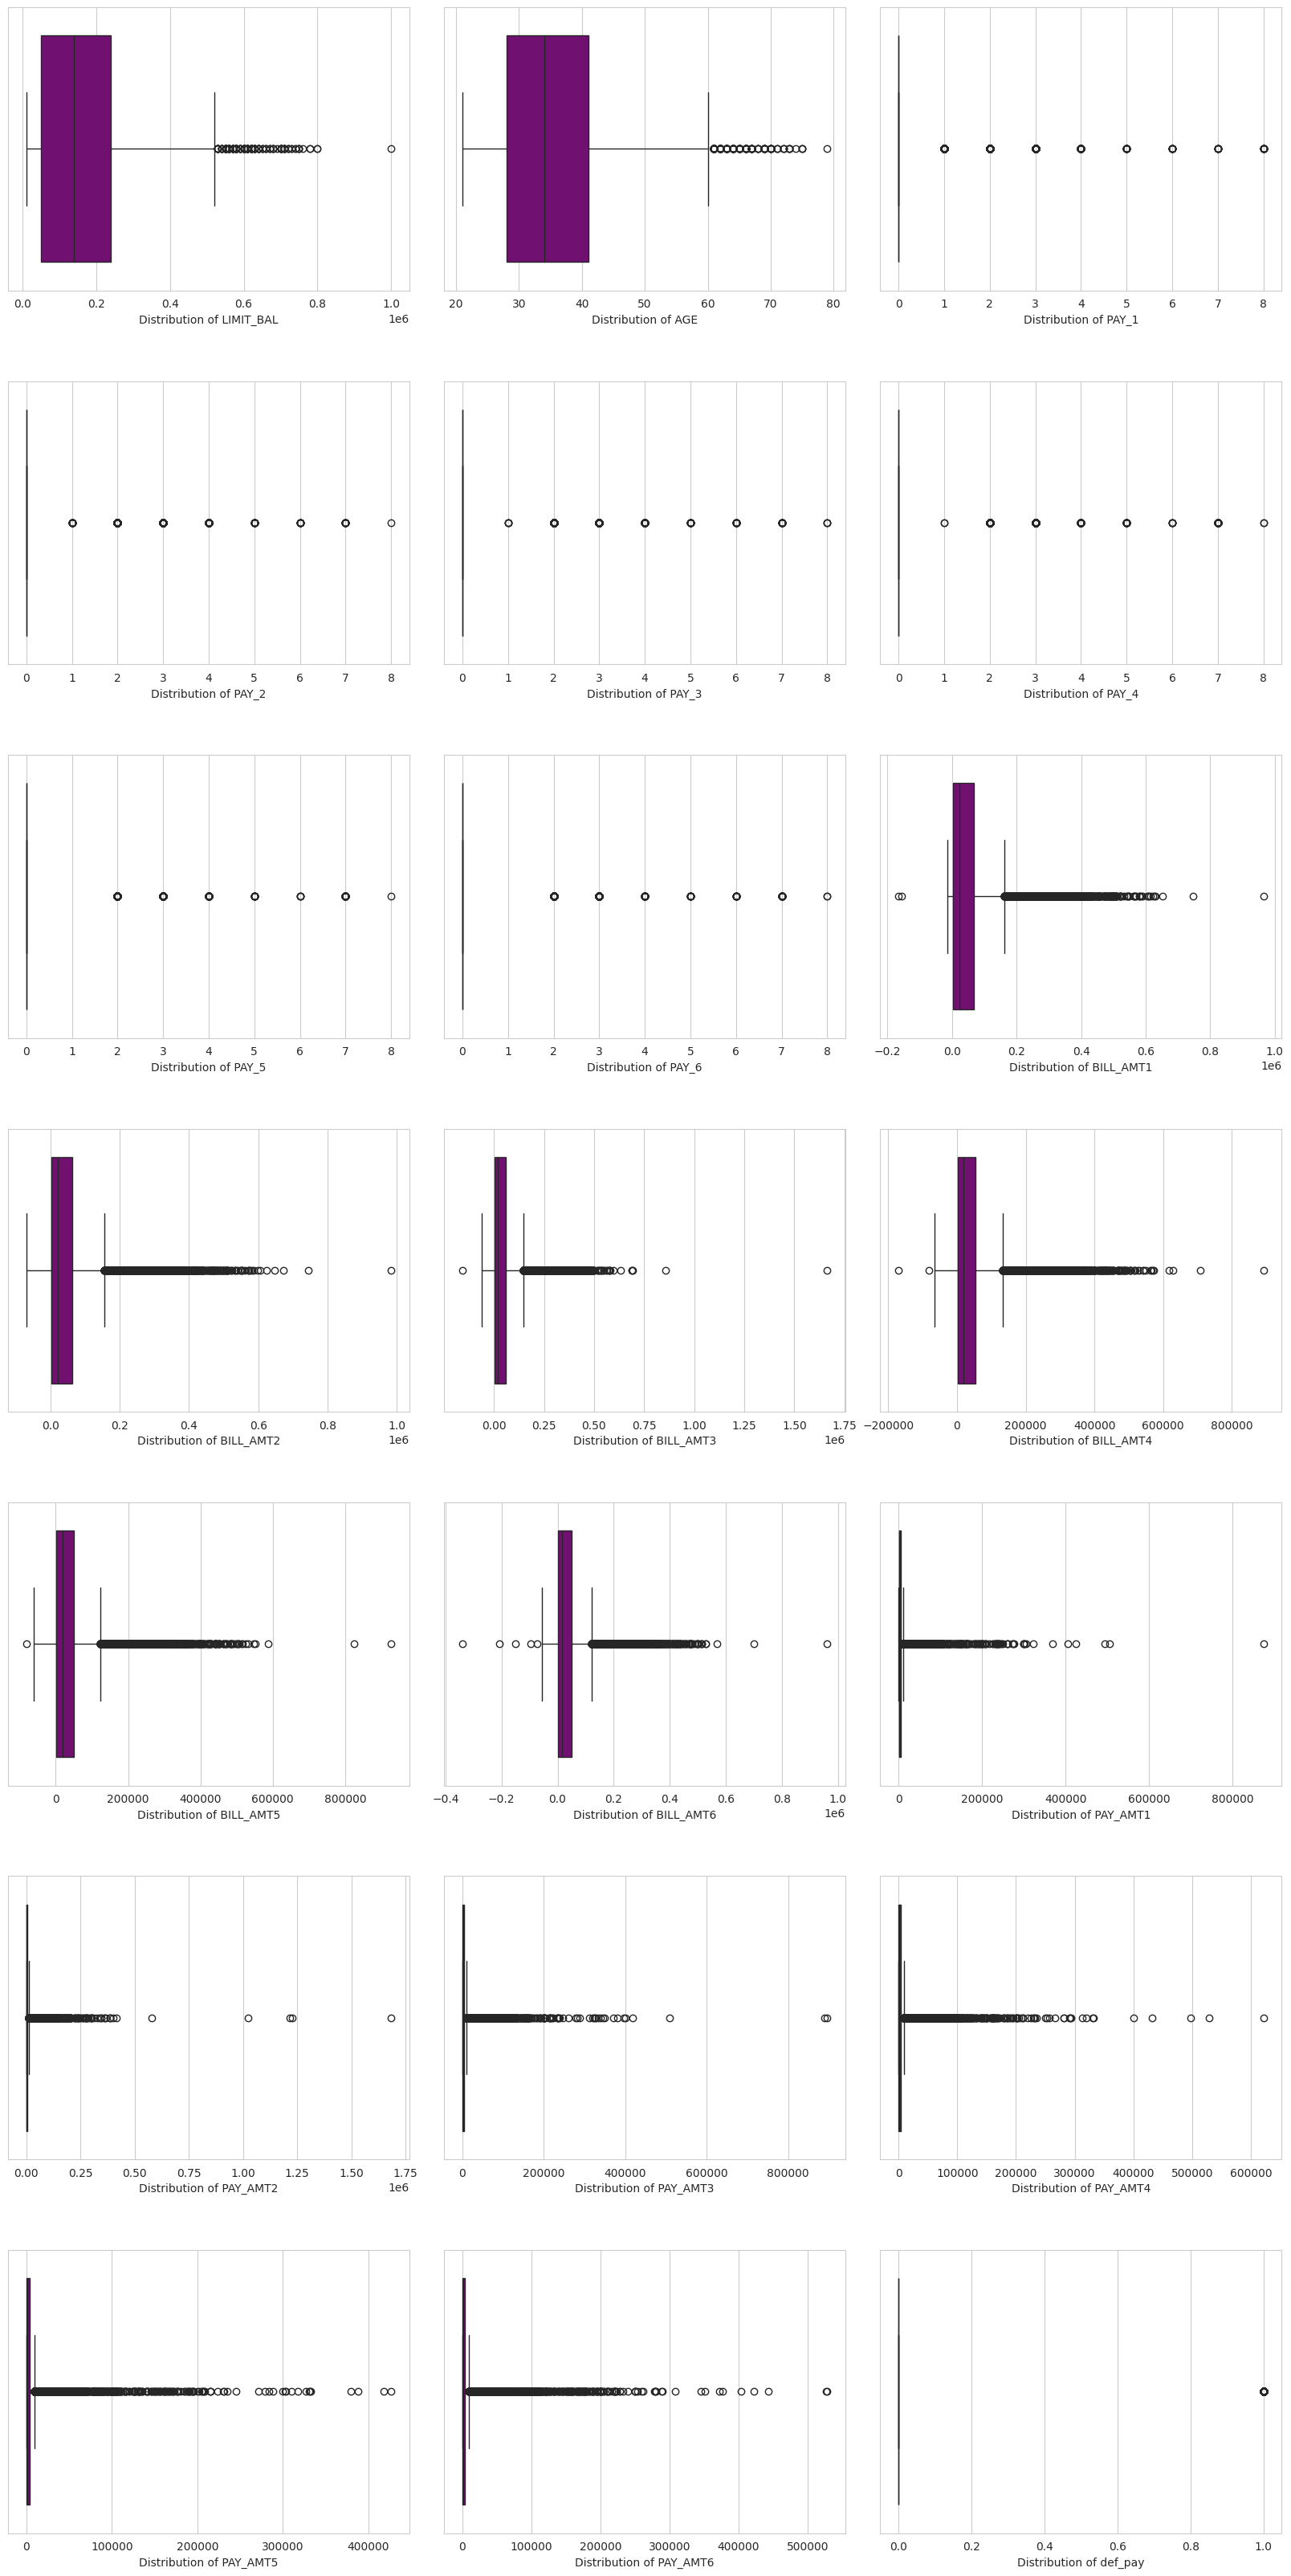

In [ ]:
# Checking for outliers
fig = plt.figure(figsize=(16, 32))  # Set the size of the figure
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

c = 1  # Counter for subplots
for i in numeric_columns:
    plt.subplot(7, 3, c)  # Create subplots in a 7x3 grid
    plt.xlabel('Distribution of {}'.format(i))  # Set the x-axis label
    sns.boxplot(x=i, data=data, color="purple")  # Create a boxplot for the numeric feature
    c = c + 1  # Increment the subplot counter
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)  # Adjust subplot layout parameters

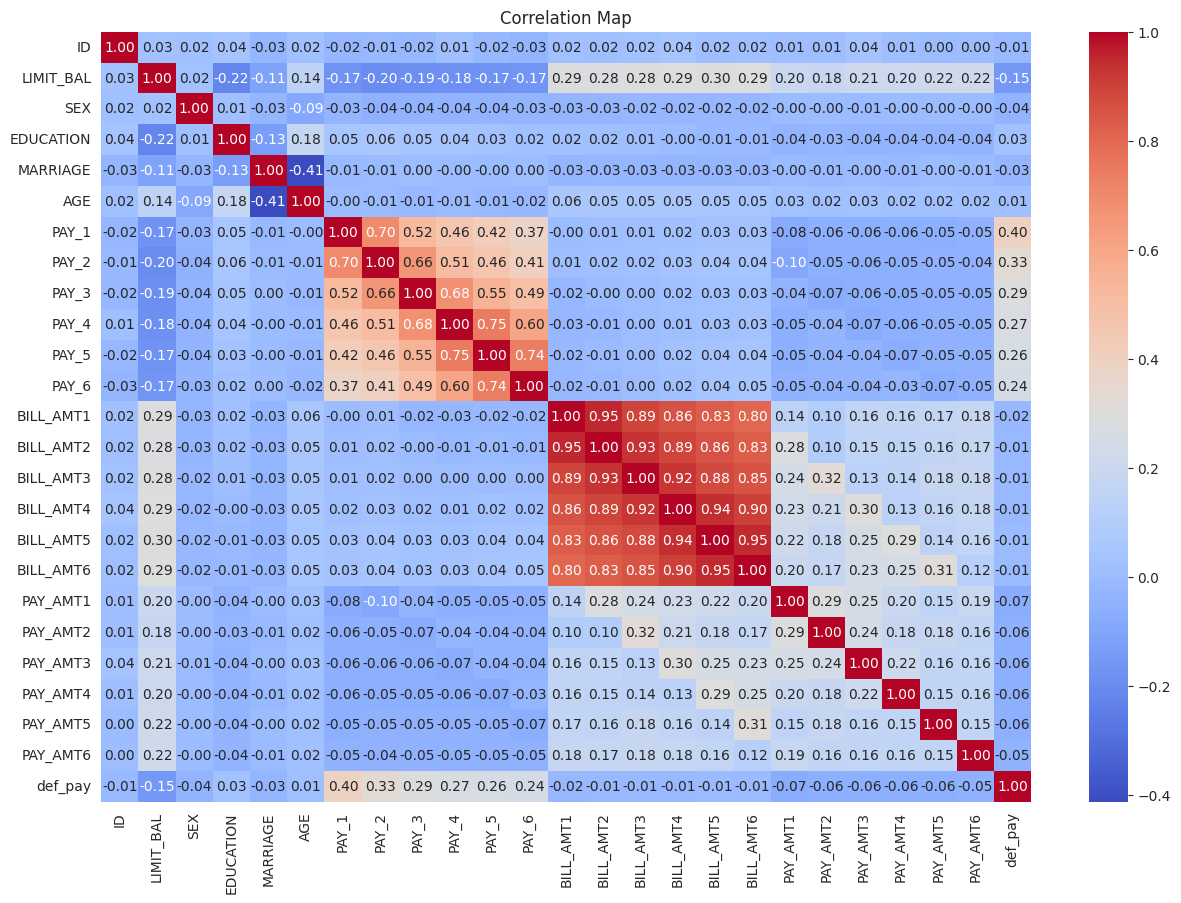

In [ ]:
# Exclude non-numeric columns from the correlation matrix
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = data[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Map')
plt.show()


## Data Cleaning and Preprocessing


In [ ]:
# Assuming no significant cleaning is required for this dataset

In [ ]:
# Changed Gender from int64 to str
data['SEX'] = data['SEX'].astype('str')

# Changed EDUCATION from int64 to str
data['EDUCATION'] = data['EDUCATION'].astype('str')

# Changed MARRIAGE from int64 to str
data['MARRIAGE'] = data['MARRIAGE'].astype('str')

# Deleted column ID from data
data.drop(['ID'], axis=1, inplace=True)

# Deleted column Age_Bin from data
data.drop('AGE_BIN', axis=1, inplace=True)


In [ ]:
data.dtypes

LIMIT_BAL    float64
SEX           object
EDUCATION     object
MARRIAGE      object
AGE            int64
PAY_1          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
def_pay        int64
dtype: object

In [ ]:
# Encoding Categorical Variables (not applied on sex as it is not ordinal)
#label_encoder = LabelEncoder()
#data['SEX'] = label_encoder.fit_transform(data['SEX'])

In [ ]:
#data

In [ ]:
#Applying one hot encoding
df_onehot = pd.get_dummies(data)
df_onehot.dtypes

LIMIT_BAL      float64
AGE              int64
PAY_1            int64
PAY_2            int64
PAY_3            int64
PAY_4            int64
PAY_5            int64
PAY_6            int64
BILL_AMT1      float64
BILL_AMT2      float64
BILL_AMT3      float64
BILL_AMT4      float64
BILL_AMT5      float64
BILL_AMT6      float64
PAY_AMT1       float64
PAY_AMT2       float64
PAY_AMT3       float64
PAY_AMT4       float64
PAY_AMT5       float64
PAY_AMT6       float64
def_pay          int64
SEX_1            uint8
SEX_2            uint8
EDUCATION_1      uint8
EDUCATION_2      uint8
EDUCATION_3      uint8
EDUCATION_4      uint8
EDUCATION_5      uint8
MARRIAGE_1       uint8
MARRIAGE_2       uint8
MARRIAGE_3       uint8
dtype: object

In [ ]:
# Assigning X and y
#Seperating the Target feature and other features

# X = data.drop(['ID', 'def_pay','AGE_BIN'], axis=1)
# y = data['def_pay']# Train-Test Split

In [ ]:
# Assuming 'def_pay' is the correct column name for the target variable

# Create the feature matrix X by excluding the column labeled 'def_pay'
X = df_onehot.drop('def_pay', axis=1)  # X contains all columns except the target variable

# Create the target variable y by selecting only the column labeled 'def_pay'
y = df_onehot[['def_pay']]  # y contains only the target variable column

<ipython-input-63-0e93d1348ad4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


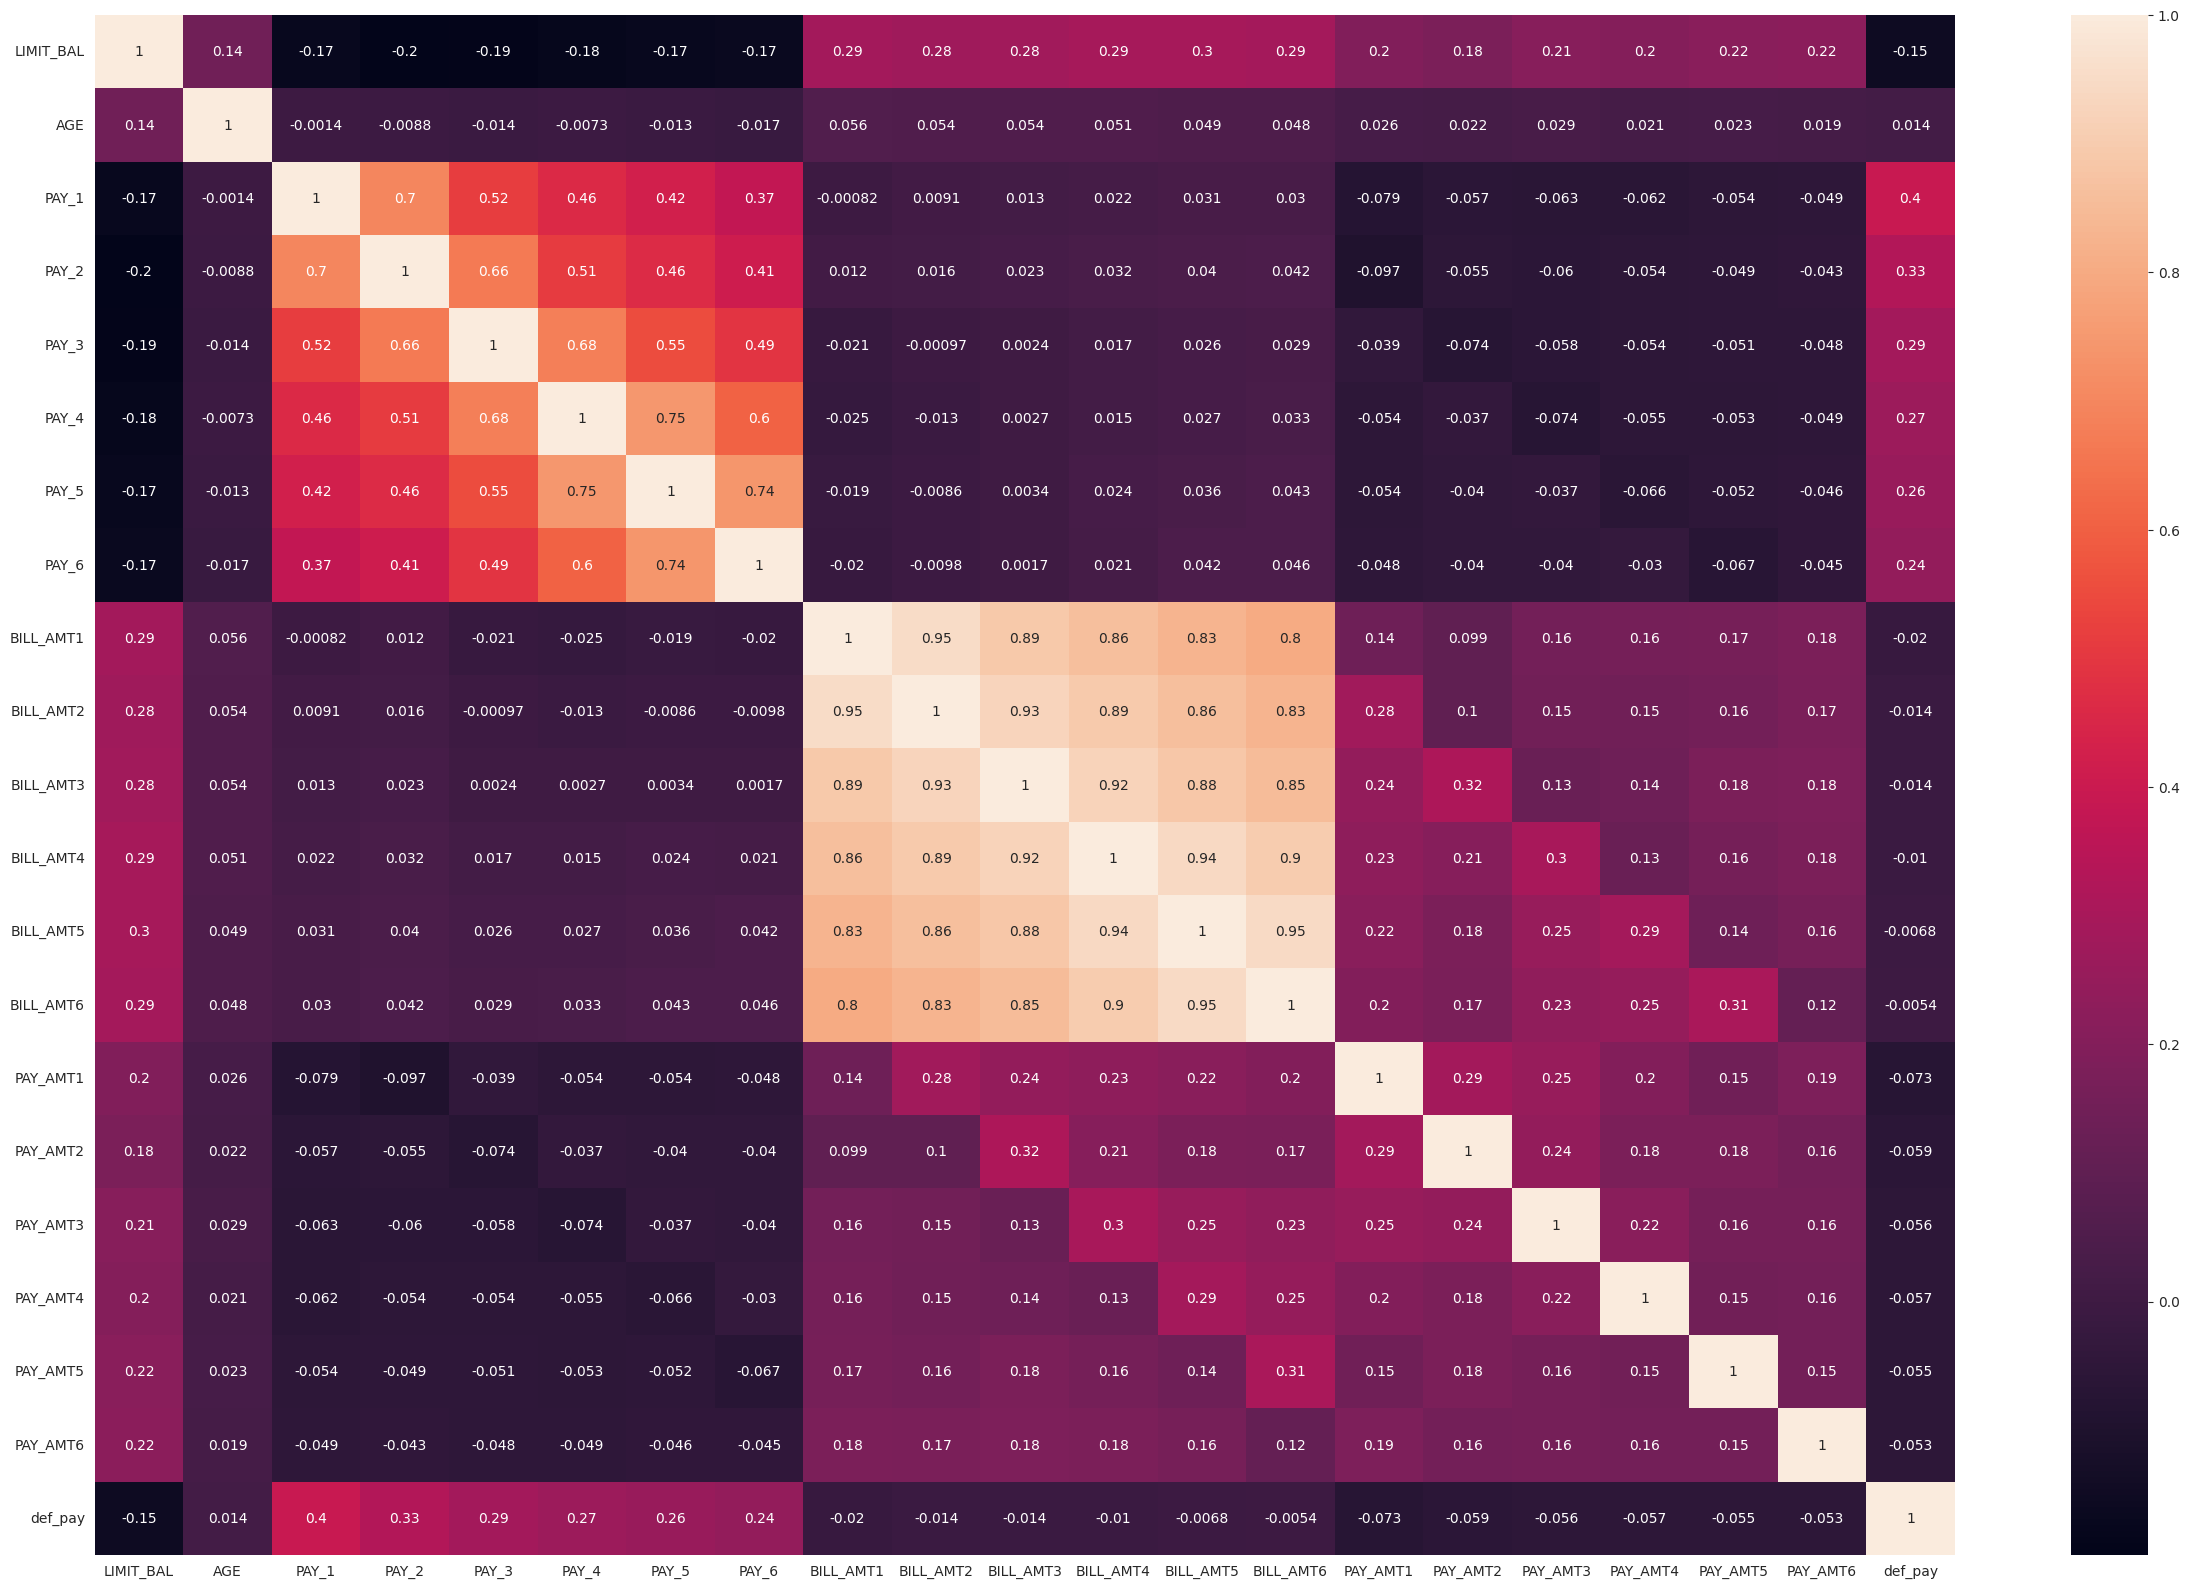

In [ ]:
plt.subplots(figsize=(30,20))
sns.heatmap(data.corr(), annot=True)
plt.show()

### Splitting into train and test

In [ ]:
# Split the dataset into training and testing sets
# X: Features (independent variables)
# y: Target variable (dependent variable)
# test_size: The proportion of the dataset to include in the test split (here, 30% for testing)
# random_state: Seed for random number generation to ensure reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Assuming 'categorical_features' is a list of column names representing categorical features
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']

# Assuming 'target_variable' is the column name for the target variable
target_variable = 'def_pay'

# Extracting all column names from the original dataset
all_features = data.columns

# Creating a list of numerical features by excluding categorical features and the target variable
numerical_features = [feature for feature in all_features if feature not in categorical_features + [target_variable]]

print("Numerical Features:", numerical_features)

Numerical Features: ['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [ ]:
# Instantiate the MinMaxScaler to see if the accuracy improves
scaler = MinMaxScaler()

# Apply MinMax scaling to the specified numerical features for both training and testing sets
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Display the scaled training and testing sets
print("Scaled Training Set:")
print(X_train.head())

print("\nScaled Testing Set:")
print(X_test.head())

Scaled Training Set:
       LIMIT_BAL       AGE  PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  \
28465   0.232323  0.351852   0.00  0.000   0.00  0.000   0.00   0.00   
27622   0.040404  0.037037   0.00  0.000   0.00  0.000   0.00   0.00   
28376   0.040404  0.277778   0.25  0.250   0.25  0.250   0.00   0.00   
10917   0.191919  0.611111   0.75  0.625   0.50  0.375   0.25   0.25   
27234   0.232323  0.259259   0.00  0.000   0.00  0.000   0.00   0.00   

       BILL_AMT1  BILL_AMT2  ...  SEX_1  SEX_2  EDUCATION_1  EDUCATION_2  \
28465   0.146519   0.066220  ...      0      1            1            0   
27622   0.149554   0.068572  ...      0      1            1            0   
28376   0.187403   0.109078  ...      0      1            0            1   
10917   0.244020   0.168398  ...      0      1            0            0   
27234   0.148310   0.068125  ...      1      0            1            0   

       EDUCATION_3  EDUCATION_4  EDUCATION_5  MARRIAGE_1  MARRIAGE_2  \
28465            

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [ ]:
y_predict_logi = lr.predict(X_test)
acc= accuracy_score(y_test, y_predict_logi)
prec = precision_score(y_test, y_predict_logi)
rec = recall_score(y_test, y_predict_logi)
f1 = f1_score(y_test, y_predict_logi)

result = pd.DataFrame([['Logistic Regression',acc, prec,rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
result

Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.814889   0.664062  0.303571  0.416667

In [ ]:
cm = confusion_matrix(y_test, y_predict_logi)
cm

array([[6739,  301],
       [1365,  595]])

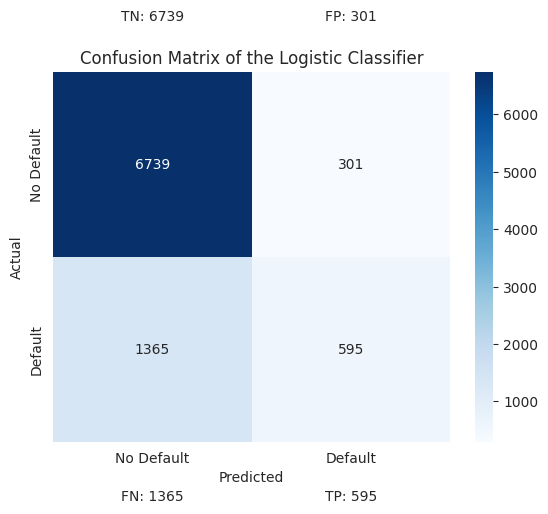

In [ ]:
# Assuming you have the confusion matrix (cm) and the predicted values (y_predict_logi)
cm = confusion_matrix(y_test, y_predict_logi)

# Labels for actual and predicted values
class_labels = ['No Default', 'Default']

# Labels for TN, TP, FN, FP
tn, fp, fn, tp = cm.ravel()
labels = [f'TN: {tn}', f'FP: {fp}', f'FN: {fn}', f'TP: {tp}']

# Plotting the confusion matrix
plt.title('Confusion Matrix of the Logistic Classifier')
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels, cmap="Blues")

# Adding labels for TN, FP, FN, TP above and below the matrix box
for i in range(len(labels)):
    plt.text(i % 2 + 0.5, -0.3 if i < 2 else 2.3, labels[i], ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5, edgecolor='white'))

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

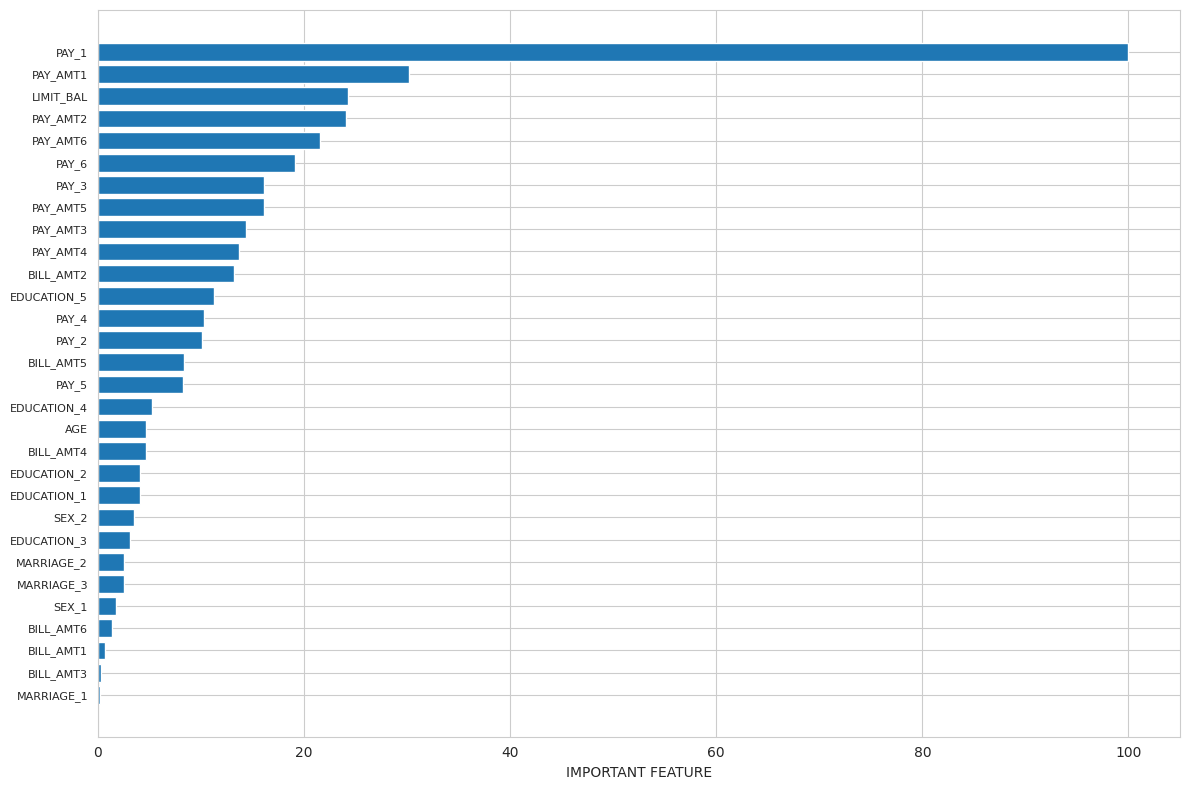

In [ ]:
#plotting feature importance
feature_importance = abs(lr.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .3

featfig = plt.figure(figsize=(12,8))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('IMPORTANT FEATURE')

plt.tight_layout()
plt.show()

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini',n_estimators=100)
rf.fit(X_train,y_train)

<ipython-input-73-da24c8efb369>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


RandomForestClassifier()

In [ ]:
y_predict_r = rf.predict(X_test)
acc = accuracy_score(y_test, y_predict_r)
prec = precision_score(y_test, y_predict_r)
rec = recall_score(y_test, y_predict_r)
f1 = f1_score(y_test, y_predict_r)

result = pd.DataFrame([['Random Forest',acc, prec,rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
result

Model  Accuracy  Precision    Recall  F1 Score
0  Random Forest  0.814556   0.626632  0.367347  0.463171

In [ ]:
cm = confusion_matrix(y_test, y_predict_r)
cm

array([[6611,  429],
       [1240,  720]])

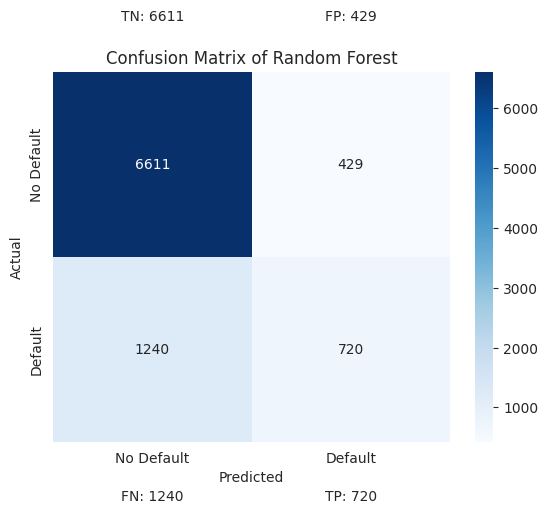

In [ ]:
# Assuming you have the confusion matrix (cm) and the predicted values (y_predict_logi)
cm = confusion_matrix(y_test, y_predict_r)

# Labels for actual and predicted values
class_labels = ['No Default', 'Default']

# Labels for TN, TP, FN, FP
tn, fp, fn, tp = cm.ravel()
labels = [f'TN: {tn}', f'FP: {fp}', f'FN: {fn}', f'TP: {tp}']

# Plotting the confusion matrix
plt.title('Confusion Matrix of Random Forest')
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels, cmap="Blues")

# Adding labels for TN, FP, FN, TP above and below the matrix box
for i in range(len(labels)):
    plt.text(i % 2 + 0.5, -0.3 if i < 2 else 2.3, labels[i], ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5, edgecolor='white'))

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<Axes: >

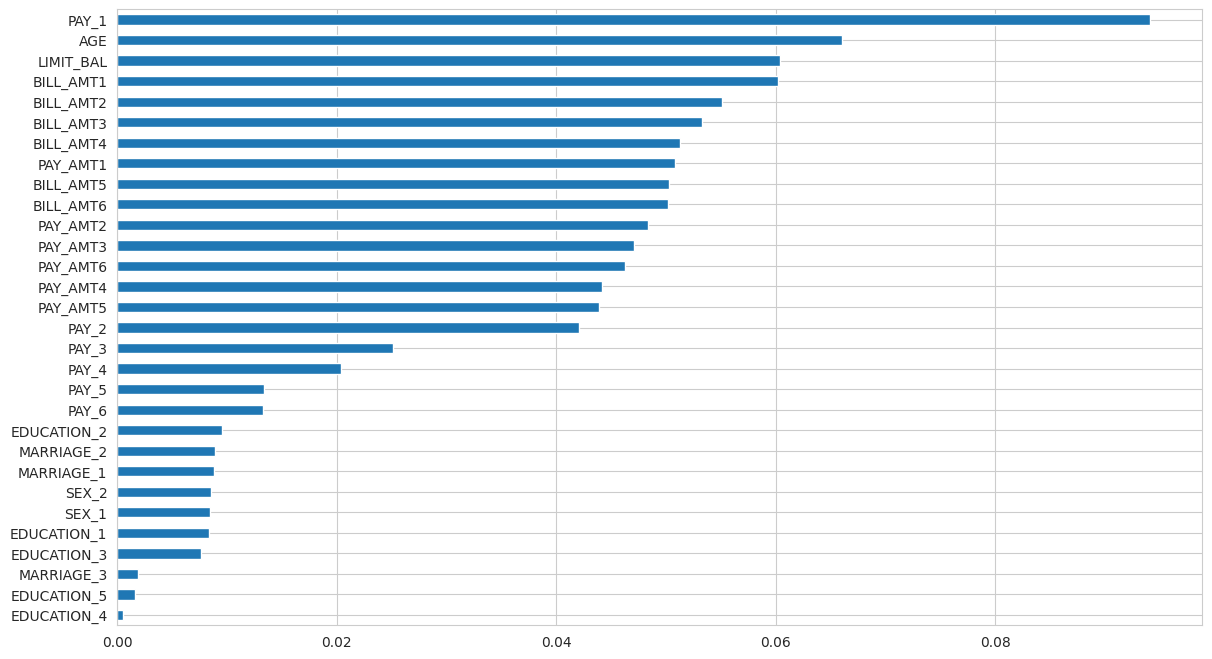

In [ ]:
#plotting feature importance
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.sort_values().plot(kind="barh",figsize=(14, 8))

## DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = 'entropy', random_state = 17)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=17)

In [ ]:
y_predict_d = dtree.predict(X_test)
#roc=roc_auc_score(y_test, y_predict_d)
acc = accuracy_score(y_test, y_predict_d)
prec = precision_score(y_test, y_predict_d)
rec = recall_score(y_test, y_predict_d)
f1 = f1_score(y_test,y_predict_d)

results= pd.DataFrame([['Decision Tree',acc,prec,rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results

Model  Accuracy  Precision    Recall  F1 Score
0  Decision Tree  0.733889    0.39206  0.403061  0.397484

[Text(0.7538563668106035, 0.9886363636363636, 'x[2] <= 0.188\nentropy = 0.765\nsamples = 21000\nvalue = [16324, 4676]'),
 Text(0.5699312612888099, 0.9659090909090909, 'x[3] <= 0.188\nentropy = 0.649\nsamples = 18780\nvalue = [15656, 3124]'),
 Text(0.35038284790634383, 0.9431818181818182, 'x[16] <= 0.001\nentropy = 0.591\nsamples = 17198\nvalue = [14744, 2454]'),
 Text(0.18252167288731172, 0.9204545454545454, 'x[8] <= 0.147\nentropy = 0.745\nsamples = 5150\nvalue = [4059, 1091]'),
 Text(0.10080751633009753, 0.8977272727272727, 'x[13] <= 0.18\nentropy = 0.852\nsamples = 1885\nvalue = [1362, 523]'),
 Text(0.06845866498317797, 0.875, 'x[1] <= 0.231\nentropy = 0.878\nsamples = 1594\nvalue = [1120, 474]'),
 Text(0.03133874004568183, 0.8522727272727273, 'x[16] <= 0.0\nentropy = 0.795\nsamples = 680\nvalue = [517, 163]'),
 Text(0.020514383603926167, 0.8295454545454546, 'x[16] <= 0.0\nentropy = 0.832\nsamples = 531\nvalue = [391, 140]'),
 Text(0.020020525958392495, 0.8068181818181818, 'x[2] <= 

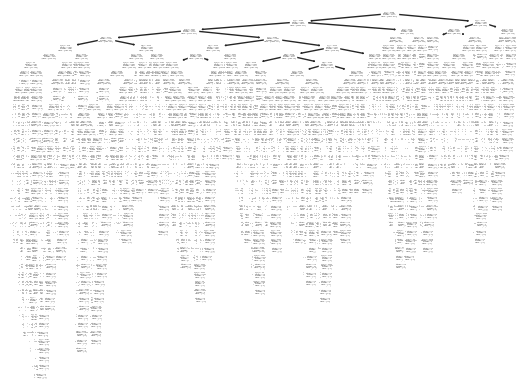

In [ ]:
# Visualising the Training set results
from sklearn import tree
tree.plot_tree(dtree)

In [ ]:
cm = confusion_matrix(y_test, y_predict_d)
cm

array([[5815, 1225],
       [1170,  790]])

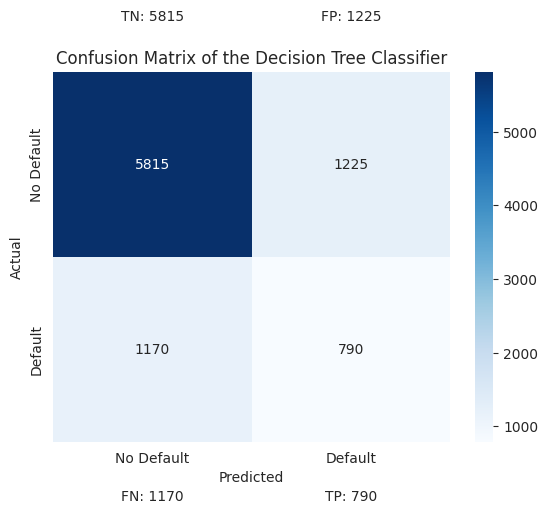

In [ ]:
# Assuming you have the confusion matrix (cm) and the predicted values (y_predict_d)
cm = confusion_matrix(y_test, y_predict_d)

# Labels for actual and predicted values
class_labels = ['No Default', 'Default']

# Labels for TN, TP, FN, FP
tn, fp, fn, tp = cm.ravel()
labels = [f'TN: {tn}', f'FP: {fp}', f'FN: {fn}', f'TP: {tp}']

# Plotting the confusion matrix
plt.title('Confusion Matrix of the Decision Tree Classifier')
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels, cmap="Blues")

# Adding labels for TN, FP, FN, TP above and below the matrix box
for i in range(len(labels)):
    plt.text(i % 2 + 0.5, -0.3 if i < 2 else 2.3, labels[i], ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5, edgecolor='white'))

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<Axes: >

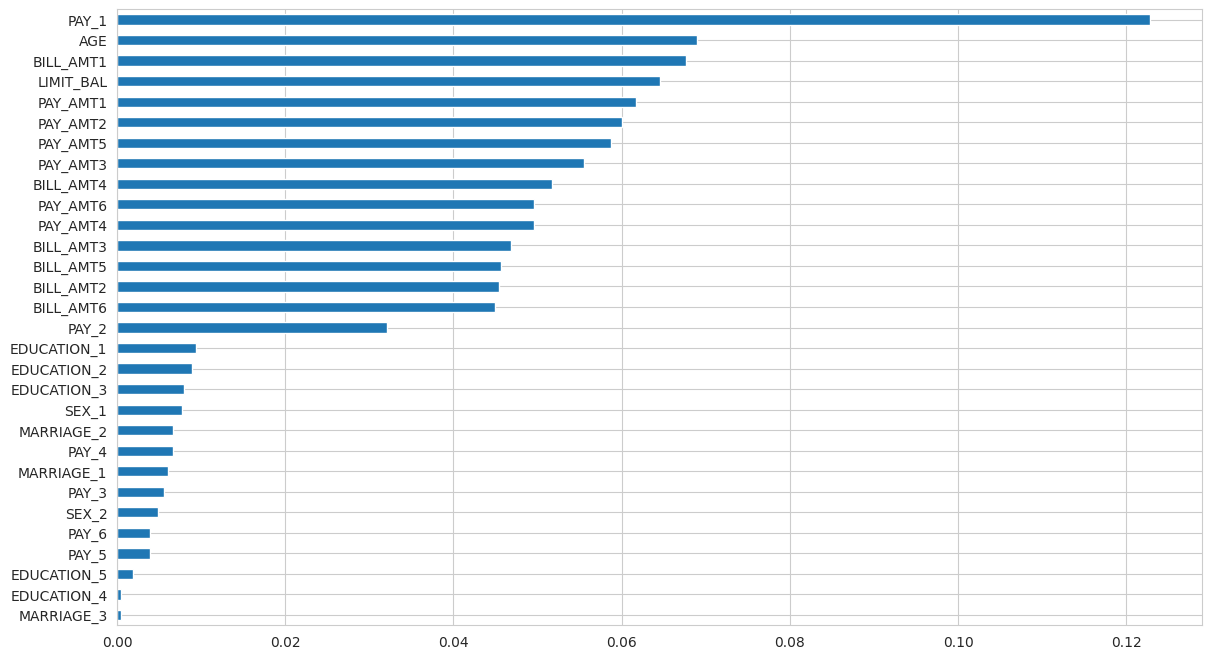

In [ ]:
#plotting feature importance
feat_importances = pd.Series(dtree.feature_importances_, index=X_train.columns)
feat_importances.sort_values().plot(kind="barh",figsize=(14, 8))

## Model Building with ROC Curve

In [ ]:
# Model Building and Evaluation
def ConfMat(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return pd.DataFrame({'Confusion Matrix': [cm], 'Accuracy': [acc], 'Precision': [prec], 'Recall': [rec], 'F1 Score': [f1]})


In [ ]:
# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
conf_mat_knn = ConfMat(y_test, y_pred_knn)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
# SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
conf_mat_svm = ConfMat(y_test, y_pred_svm)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
conf_mat_nb = ConfMat(y_test, y_pred_nb)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
conf_mat_rf = ConfMat(y_test, y_pred_rf)

<ipython-input-88-0cccff2f339f>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


In [ ]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
conf_mat_dt = ConfMat(y_test, y_pred_dt)

In [ ]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
conf_mat_lr = ConfMat(y_test, y_pred_lr)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Create a DataFrame
model_results = pd.concat([conf_mat_knn, conf_mat_svm, conf_mat_nb, conf_mat_rf, conf_mat_dt, conf_mat_lr], keys=['KNN', 'SVM', 'Naive Bayes', 'Random Forest', 'Decision Tree', 'Logistic Regression'])

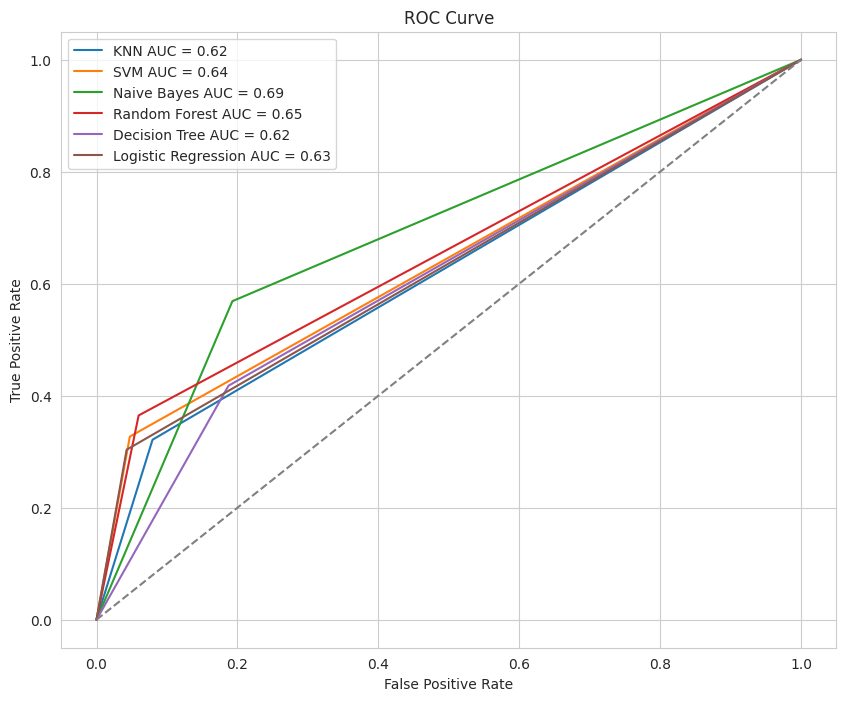

In [ ]:
# ROC Curve
plt.figure(figsize=(10, 8))
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.plot(fpr_knn, tpr_knn, label=f'KNN AUC = {roc_auc_knn:.2f}')
plt.plot(fpr_svm, tpr_svm, label=f'SVM AUC = {roc_auc_svm:.2f}')
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes AUC = {roc_auc_nb:.2f}')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest AUC = {roc_auc_rf:.2f}')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree AUC = {roc_auc_dt:.2f}')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression AUC = {roc_auc_lr:.2f}')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
# Display the results
model_results

Confusion Matrix  Accuracy  Precision  \
KNN                 0   [[6480, 560], [1330, 630]]  0.790000   0.529412   
SVM                 0   [[6707, 333], [1319, 641]]  0.816444   0.658111   
Naive Bayes         0  [[5682, 1358], [845, 1115]]  0.755222   0.450869   
Random Forest       0   [[6619, 421], [1245, 715]]  0.814889   0.629401   
Decision Tree       0  [[5721, 1319], [1141, 819]]  0.726667   0.383068   
Logistic Regression 0   [[6739, 301], [1365, 595]]  0.814889   0.664062   

                         Recall  F1 Score  
KNN                 0  0.321429  0.400000  
SVM                 0  0.327041  0.436946  
Naive Bayes         0  0.568878  0.503045  
Random Forest       0  0.364796  0.461886  
Decision Tree       0  0.417857  0.399707  
Logistic Regression 0  0.303571  0.416667

### Model 1: Logistic Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

In [ ]:
lr=LogisticRegression(C=1e9, class_weight='balanced')
lr.fit(X_train, y_train)
y_predict_test_lr = lr.predict(X_test)
y_predict_train_lr=lr.predict(X_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print('Untuned Logistic Regression Model')
print('Training F1 score:',metrics.f1_score(y_train,y_predict_train_lr))
print('Testing F1 score:',metrics.f1_score(y_test,y_predict_test_lr))


Untuned Logistic Regression Model
Training F1 score: 0.5339540532334784
Testing F1 score: 0.52386606506768


In [ ]:
t1_lr=metrics.f1_score(y_train,y_predict_train_lr)
t2_lr=metrics.f1_score(y_test,y_predict_test_lr)

In [ ]:
metric_dict = {}

#visualising evaluation metric score chart
metric_dict['without cross Logistic Regression']={'Training F1':t1_lr,'Testing F1':t2_lr}
metric_dict['without cross Logistic Regression']

{'Training F1': 0.5339540532334784, 'Testing F1': 0.52386606506768}

In [ ]:
y_pred_prob=lr.predict_proba(X_test)[:,1]

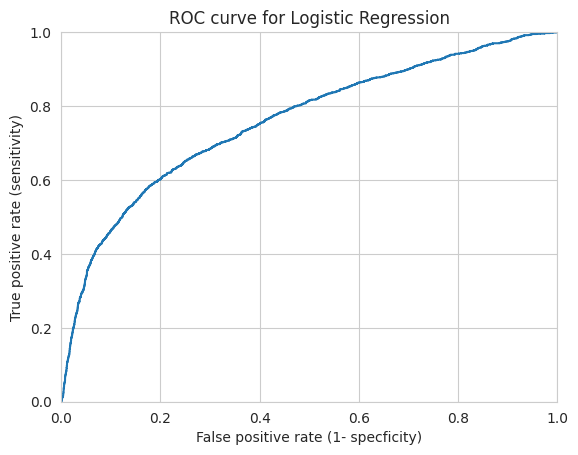

In [ ]:
#ROC Curve graph

fpr,tpr,thresholds=metrics.roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title("ROC curve for Logistic Regression")
plt.xlabel('False positive rate (1- specficity)')
plt.ylabel('True positive rate (sensitivity)')
plt.grid(True)

In [ ]:
print(metrics.roc_auc_score(y_test,y_pred_prob))

0.7583184282235622


In [ ]:
print('accuracy:',metrics.accuracy_score(y_test,y_predict_test_lr))
print('precision:',metrics.precision_score(y_test,y_predict_test_lr))
print('recall:',metrics.recall_score(y_test,y_predict_test_lr))
print('F1:',metrics.f1_score(y_test,y_predict_test_lr))


accuracy: 0.7772222222222223
precision: 0.49000444247001335
recall: 0.5627551020408164
F1: 0.52386606506768


[[13757  2567]
 [ 2038  2638]]


[Text(0, 0.5, 'Not default'), Text(0, 1.5, 'Default')]

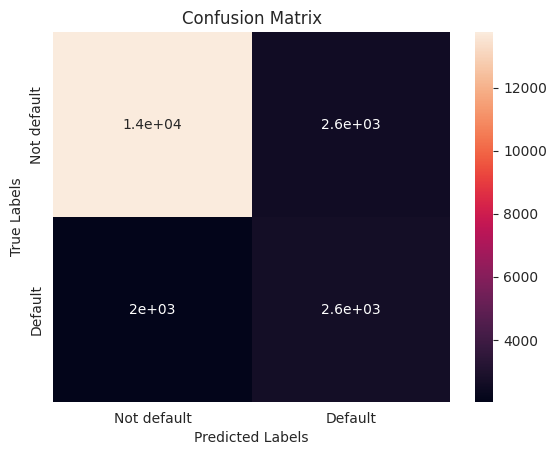

In [ ]:
#Confusion Matrix for training set

labels=['Not default','Default']
cm=confusion_matrix(y_train,y_predict_train_lr)
print(cm)

ax=plt.subplot()
sns.heatmap(cm,annot=True,ax=ax) #annot=true to annotate cells

#labels,titles and ticks
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)


[[5892 1148]
 [ 857 1103]]


[Text(0, 0.5, 'Not default'), Text(0, 1.5, 'Default')]

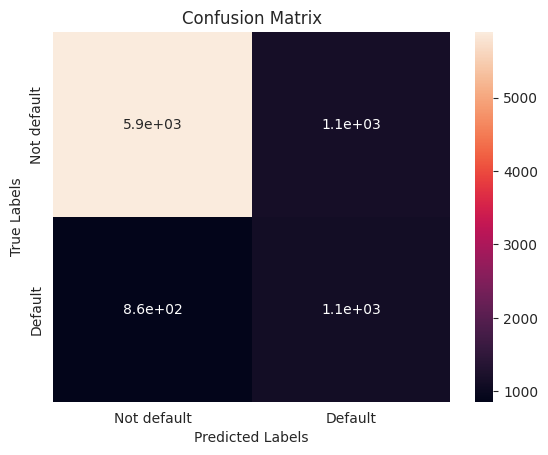

In [ ]:
#Confusion Matrix for testing set

labels=['Not default','Default']
cm=confusion_matrix(y_test,y_predict_test_lr)
print(cm)

ax=plt.subplot()
sns.heatmap(cm,annot=True,ax=ax) #annot=true to annotate cells

#labels,titles and ticks
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)


### Cross validation and Hyperparameter Tuning for Logistic Regression

In [ ]:
#Logistic regression parameter tuning

tuned_lr=LogisticRegression(random_state=42,class_weight='balanced')

#fit the algorithm

lr_para_dict = {'C': range(3, 7, 1), 'penalty': ['l1', 'l2']}


grid_lr=GridSearchCV(tuned_lr,lr_para_dict,cv=5,scoring='f1',verbose=1)
grid_lr.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=42),
             param_grid={'C': range(3, 7), 'penalty': ['l1', 'l2']},
             scoring='f1', verbose=1)

In [ ]:
print('F1 score:',grid_lr.best_score_)
print('Best hyperparameters:',grid_lr.best_params_)
print('Model object with best parameters:')
print(grid_lr.best_estimator_)


F1 score: 0.5330041184319761
Best hyperparameters: {'C': 6, 'penalty': 'l2'}
Model object with best parameters:
LogisticRegression(C=6, class_weight='balanced', random_state=42)


In [ ]:
grid_y_predict_train_lr=grid_lr.best_estimator_.predict(X_train)
grid_y_predict_test_lr=grid_lr.best_estimator_.predict(X_test)

In [ ]:
print('Tuned Logistic Regression Model Predictions')
print('F1 score on Training set:',metrics.f1_score(y_train,grid_y_predict_train_lr))
print('F1 score on Testing Set:',metrics.f1_score(y_test,grid_y_predict_test_lr))

Tuned Logistic Regression Model Predictions
F1 score on Training set: 0.533846777462505
F1 score on Testing Set: 0.5217598097502973


In [ ]:
train_tuned_lr=metrics.f1_score(y_train,grid_y_predict_train_lr)
test_tuned_lr=metrics.f1_score(y_test,grid_y_predict_test_lr)

In [ ]:
metric_dict['Tuned Logistic Regression']={'Training F1':train_tuned_lr,'Testing F1':test_tuned_lr}
metric_dict['Tuned Logistic Regression']

{'Training F1': 0.533846777462505, 'Testing F1': 0.5217598097502973}

[[5892 1148]
 [ 863 1097]]


[Text(0, 0.5, 'Not default'), Text(0, 1.5, 'Default')]

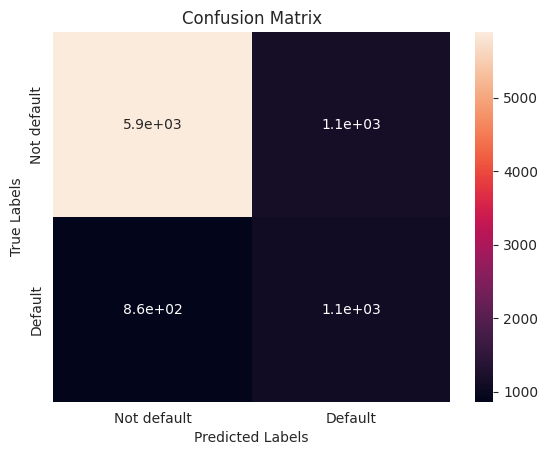

In [ ]:
#Confusion Matrix for tuned test set

labels=['Not default','Default']
cm=confusion_matrix(y_test,grid_y_predict_test_lr)
print(cm)

ax=plt.subplot()
sns.heatmap(cm,annot=True,ax=ax) #annot=true to annotate cells

#labels,titles and ticks
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)


In [ ]:
y_pred_prob_1=grid_lr.predict_proba(X_test)[:,1]

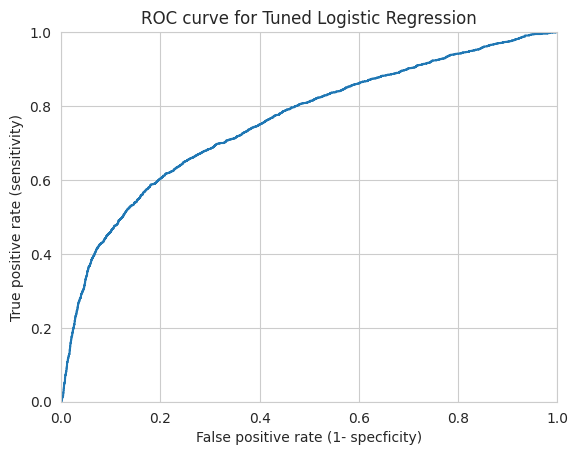

In [ ]:
#ROC Curve graph

fpr,tpr,thresholds=metrics.roc_curve(y_test,y_pred_prob_1)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title("ROC curve for Tuned Logistic Regression")
plt.xlabel('False positive rate (1- specficity)')
plt.ylabel('True positive rate (sensitivity)')
plt.grid(True)

# Model 2: Random Forest

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

In [ ]:
rf = RandomForestClassifier(criterion='gini',n_estimators=100)
rf.fit(X_train,y_train)
y_predict_test_rf = rf.predict(X_test)
y_predict_train_rf=rf.predict(X_train)

<ipython-input-116-8ee47e9c25ec>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


In [ ]:
print('Untuned Random Forest Model')
print('Training F1 score:',metrics.f1_score(y_train,y_predict_train_rf))
print('Testing F1 score:',metrics.f1_score(y_test,y_predict_test_rf))


Untuned Random Forest Model
Training F1 score: 0.9988231518134161
Testing F1 score: 0.45745713361371726


In [ ]:
t1_rf=metrics.f1_score(y_train,y_predict_train_rf)
t2_rf=metrics.f1_score(y_test,y_predict_test_rf)

In [ ]:
metric_dict = {}

#visualising evaluation metric score chart
metric_dict['without cross Random Forest']={'Training F1':t1_rf,'Testing F1':t2_rf}
metric_dict['without cross Random Forest']

{'Training F1': 0.9988231518134161, 'Testing F1': 0.45745713361371726}

In [ ]:
y_pred_prob=rf.predict_proba(X_test)[:,1]

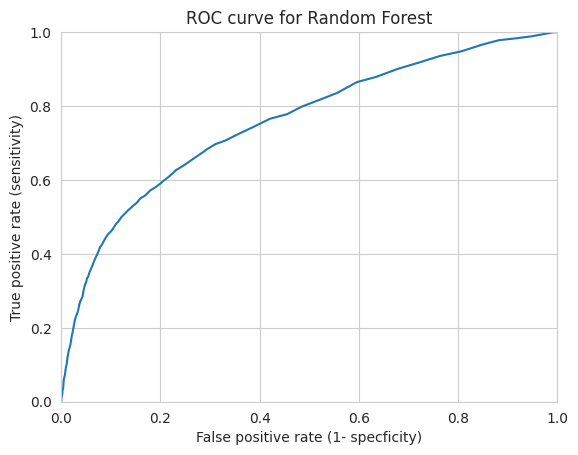

In [ ]:
#ROC Curve graph for random forest

fpr,tpr,thresholds=metrics.roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title("ROC curve for Random Forest")
plt.xlabel('False positive rate (1- specficity)')
plt.ylabel('True positive rate (sensitivity)')
plt.grid(True)

In [ ]:
print(metrics.roc_auc_score(y_test,y_pred_prob))

0.757535475127551


In [ ]:
print('accuracy:',metrics.accuracy_score(y_test,y_predict_test_rf))
print('precision:',metrics.precision_score(y_test,y_predict_test_rf))
print('recall:',metrics.recall_score(y_test,y_predict_test_rf))
print('F1:',metrics.f1_score(y_test,y_predict_test_rf))


accuracy: 0.8136666666666666
precision: 0.6251105216622458
recall: 0.3607142857142857
F1: 0.45745713361371726


[[16321     3]
 [    8  4668]]


[Text(0, 0.5, 'Not default'), Text(0, 1.5, 'Default')]

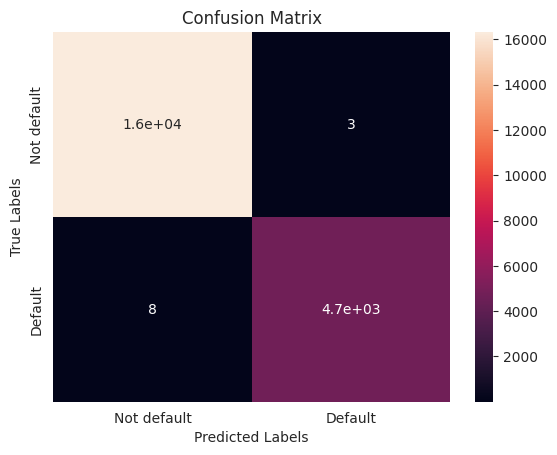

In [ ]:
#Confusion Matrix for RF training set

labels=['Not default','Default']
cm=confusion_matrix(y_train,y_predict_train_rf)
print(cm)

ax=plt.subplot()
sns.heatmap(cm,annot=True,ax=ax) #annot=true to annotate cells

#labels,titles and ticks
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[6616  424]
 [1253  707]]


[Text(0, 0.5, 'Not default'), Text(0, 1.5, 'Default')]

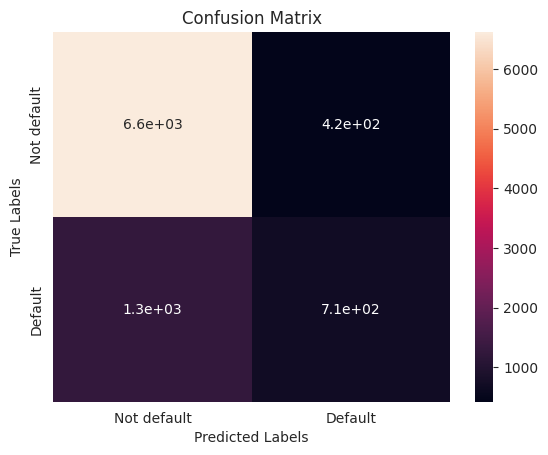

In [ ]:
#Confusion Matrix for RF testing set

labels=['Not default','Default']
cm=confusion_matrix(y_test,y_predict_test_rf)
print(cm)

ax=plt.subplot()
sns.heatmap(cm,annot=True,ax=ax) #annot=true to annotate cells

#labels,titles and ticks
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)


### Cross validation and Hyperparameter Tuning for Random Forest

In [ ]:
tuned_rf = RandomForestClassifier(random_state=5,criterion='gini',class_weight='balanced')
rf_para_dict = {'n_estimators':[50,100],'max_depth':list(range(2,15)),'max_features':list(range(5,15))}

grid_rf=GridSearchCV(tuned_rf,rf_para_dict,cv=5,scoring='f1',verbose=1,n_jobs=2)
grid_rf.fit(X_train, y_train)


Fitting 5 folds for each of 260 candidates, totalling 1300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=5),
             n_jobs=2,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14],
                         'max_features': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'n_estimators': [50, 100]},
             scoring='f1', verbose=1)

In [ ]:
print('F1 score:',grid_rf.best_score_)
print('Best hyperparameters:',grid_rf.best_params_)
print('Model object with best parameters:')
print(grid_rf.best_estimator_)


F1 score: 0.5476194268548877
Best hyperparameters: {'max_depth': 7, 'max_features': 5, 'n_estimators': 100}
Model object with best parameters:
RandomForestClassifier(class_weight='balanced', max_depth=7, max_features=5,
                       random_state=5)


In [ ]:
grid_y_predict_train_rf=grid_rf.best_estimator_.predict(X_train)
grid_y_predict_test_rf=grid_rf.best_estimator_.predict(X_test)

In [ ]:
print('Tuned Random Forest Model Predictions')
print('F1 score on Training set:',metrics.f1_score(y_train,grid_y_predict_train_rf))
print('F1 score on Testing Set:',metrics.f1_score(y_test,grid_y_predict_test_rf))

Tuned Random Forest Model Predictions
F1 score on Training set: 0.5754228174797145
F1 score on Testing Set: 0.5265578293860658


In [ ]:
train_tuned_rf=metrics.f1_score(y_train,grid_y_predict_train_rf)
test_tuned_rf=metrics.f1_score(y_test,grid_y_predict_test_rf)

In [ ]:
metric_dict['Tuned Random Forest']={'Training F1':train_tuned_rf,'Testing F1':test_tuned_rf}
metric_dict['Tuned Random Forest']

{'Training F1': 0.5754228174797145, 'Testing F1': 0.5265578293860658}

[[5796 1244]
 [ 815 1145]]


[Text(0, 0.5, 'Not default'), Text(0, 1.5, 'Default')]

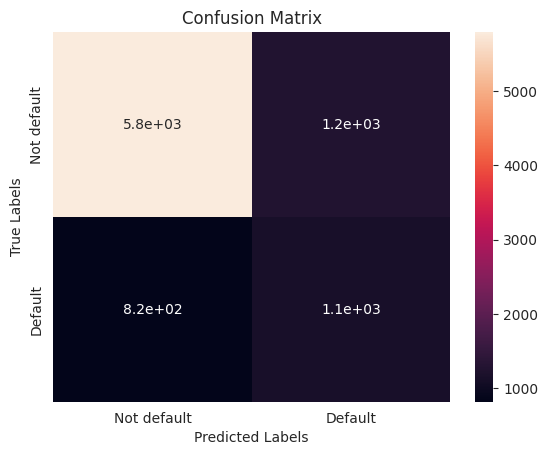

In [ ]:
#Confusion Matrix for tuned test set

labels=['Not default','Default']
cm=confusion_matrix(y_test,grid_y_predict_test_rf)
print(cm)

ax=plt.subplot()
sns.heatmap(cm,annot=True,ax=ax) #annot=true to annotate cells

#labels,titles and ticks
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)


In [ ]:
y_pred_prob_1=grid_rf.predict_proba(X_test)[:,1]

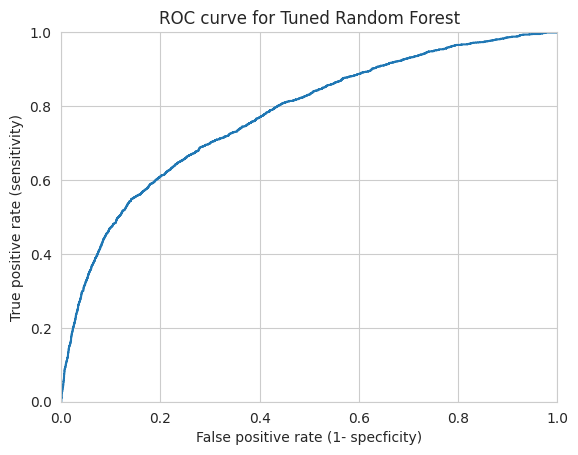

In [ ]:
#ROC Curve graph

fpr,tpr,thresholds=metrics.roc_curve(y_test,y_pred_prob_1)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title("ROC curve for Tuned Random Forest")
plt.xlabel('False positive rate (1- specficity)')
plt.ylabel('True positive rate (sensitivity)')
plt.grid(True)

In [ ]:
print(metrics.roc_auc_score(y_test,y_pred_prob_1))

0.7730304962894248


## Models using mixed features

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline
from matplotlib import pyplot

from numpy import mean
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [ ]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=2)

# Error from OpenAI!
def fit_model(model, model_name):
    model.fit(trainX,trainy)
    md_probs = model.predict_proba(testX)
    md_probs = md_probs[:,1]
    md_auc = roc_auc_score(testy, md_probs)
    print(model_name, " : ", md_auc)
    md_fpr, md_tpr, _ = roc_curve(testy, md_probs)
    pyplot.plot(md_fpr, md_tpr, marker='.', label=model_name)
    #return (md_fpr, md_tpr)

Logistic  :  0.6588118265730677
Decision Tree  :  0.7549379511643695
Random Forest  :  0.7761134173287777
Gradient Boosting  :  0.7786133521890249
k-NN  :  0.6050463336913395
Scaled k-NN  :  0.7003462929467821


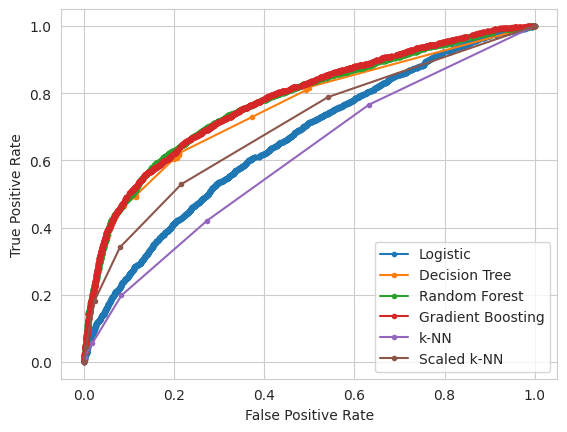

In [ ]:
lr = LogisticRegression()
fit_model(lr, "Logistic")

dt = DecisionTreeClassifier(max_depth=5)
fit_model(dt, "Decision Tree")

rf = RandomForestClassifier(max_depth=5,n_estimators=50)
fit_model(rf, "Random Forest")

gb = GradientBoostingClassifier(max_depth=2,n_estimators=50)
fit_model(gb, "Gradient Boosting")

kn = KNeighborsClassifier(n_neighbors=5)
fit_model(kn, "k-NN")

pipe_kn = Pipeline([("scaler", MinMaxScaler()), ("knr", KNeighborsClassifier(n_neighbors=5))])
fit_model(pipe_kn, "Scaled k-NN")

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Logistic Regression Metrics:
Accuracy: 0.7787
Precision: 0.7500
Recall: 0.0015
F1 Score: 0.0030
ROC AUC: 0.6588
-----------------------
Decision Tree Metrics:
Accuracy: 0.8197
Precision: 0.6691
Recall: 0.3681
F1 Score: 0.4749
ROC AUC: 0.7549
-----------------------
Random Forest Metrics:
Accuracy: 0.8167
Precision: 0.7098
Recall: 0.2919
F1 Score: 0.4136
ROC AUC: 0.7765
-----------------------
Gradient Boosting Metrics:
Accuracy: 0.8228
Precision: 0.6958
Recall: 0.3556
F1 Score: 0.4706
ROC AUC: 0.7786
-----------------------
k-NN Metrics:
Accuracy: 0.7573
Precision: 0.4031
Recall: 0.1981
F1 Score: 0.2656
ROC AUC: 0.6050
-----------------------
Scaled k-NN Metrics:
Accuracy: 0.7917
Precision: 0.5479
Recall: 0.3410
F1 Score: 0.4204
ROC AUC: 0.7003
-----------------------


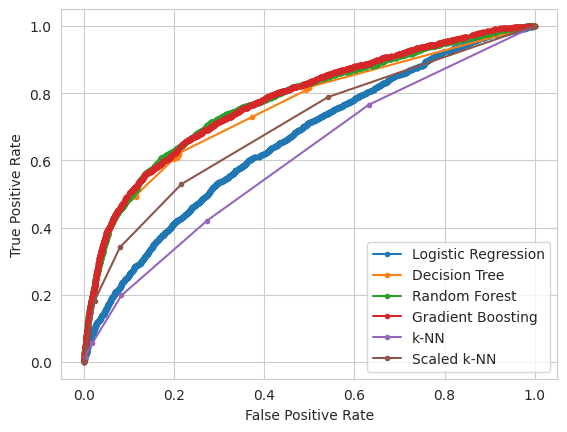

In [ ]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=2)

def fit_model(model, model_name):
    model.fit(trainX, trainy)
    md_preds = model.predict(testX)
    md_probs = model.predict_proba(testX)[:, 1]

    accuracy = accuracy_score(testy, md_preds)
    precision = precision_score(testy, md_preds)
    recall = recall_score(testy, md_preds)
    f1 = f1_score(testy, md_preds)
    roc_auc = roc_auc_score(testy, md_probs)

    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("-----------------------")

    md_fpr, md_tpr, _ = roc_curve(testy, md_probs)
    plt.plot(md_fpr, md_tpr, marker='.', label=model_name)

# Define classifiers
lr = LogisticRegression()
dt = DecisionTreeClassifier(max_depth=5)
rf = RandomForestClassifier(max_depth=5, n_estimators=50)
gb = GradientBoostingClassifier(max_depth=2, n_estimators=50)
kn = KNeighborsClassifier(n_neighbors=5)
pipe_kn = Pipeline([("scaler", MinMaxScaler()), ("knr", KNeighborsClassifier(n_neighbors=5))])

# Fit and evaluate models
fit_model(lr, "Logistic Regression")
fit_model(dt, "Decision Tree")
fit_model(rf, "Random Forest")
fit_model(gb, "Gradient Boosting")
fit_model(kn, "k-NN")
fit_model(pipe_kn, "Scaled k-NN")

# Display ROC curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

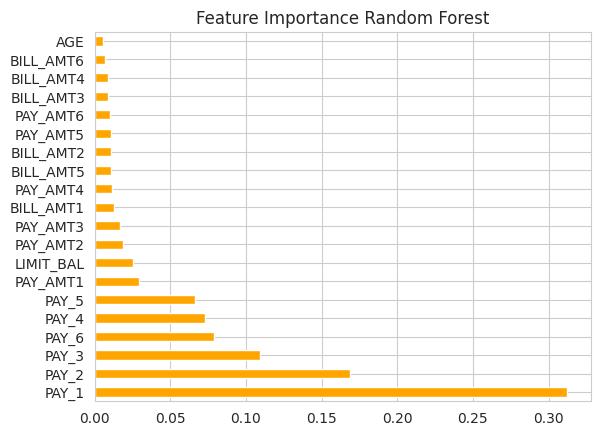

In [ ]:
clfRF = RandomForestClassifier(max_depth=5, max_features=4, min_samples_split=8,
                      n_estimators=100)#, random_state=0)
clfRF.fit(trainX, trainy)
importance_rf = pd.Series(clfRF.feature_importances_, index=trainX.columns)
importance_rf_sorted = importance_rf.sort_values()
importance_rf_sorted.nlargest(20).plot(kind='barh', color='orange')
plt.title("Feature Importance Random Forest")
plt.show()

In [ ]:
!pip install scikit-learn

In [ ]:
def fitting_models_CV2():
    cv = RepeatedKFold(n_splits=10, n_repeats=1)#, random_state=1)

    lr=LogisticRegression()
    dt = DecisionTreeClassifier(max_depth=5)
    rf = RandomForestClassifier(max_depth=5,n_estimators=50)
    gb = GradientBoostingClassifier(max_depth=2,n_estimators=50)
    kn = KNeighborsClassifier(n_neighbors=5)
    pipe_kn = Pipeline([("scaler", MinMaxScaler()),
                         ("knr", KNeighborsClassifier(n_neighbors=5))])
    clfs = [('Logistic Regression', lr),
        ('Decision Tree', dt),
        ('Random Forest', rf),
        ('Gradient Boosting', gb),
        ('KNearest Neighbor',kn),
        ('Scaled KNearest',pipe_kn)
    ]
    for name,clf in clfs:
        start = time.perf_counter()
        #scores = cross_val_score(clf, X, y, scoring="accuracy", cv=cv)
        scores = cross_val_score(clf, X, y, scoring="roc_auc", cv=cv)
        end = time.perf_counter()
        score = format(mean(scores), '.4f')
        duration = format((end-start),'.4f')
        print("{} : {} - {}".format(name,score,duration))

In [ ]:
fitting_models_CV2()

Logistic Regression : 0.6538 - 4.6666
Decision Tree : 0.7559 - 3.8309
Random Forest : 0.7737 - 34.9719
Gradient Boosting : 0.7747 - 49.8041
KNearest Neighbor : 0.6091 - 5.0592
Scaled KNearest : 0.6993 - 7.1848


In [ ]:
!pip install mixed-naive-bayes


In [ ]:
from sklearn.naive_bayes import MultinomialNB, CategoricalNB, GaussianNB
from sklearn.preprocessing import LabelEncoder
from mixed_naive_bayes import MixedNB
import numpy as np

In [ ]:
def convert_categorical(data):
    df_q = pd.DataFrame()
    label_encoder = LabelEncoder()
    for col in data:
        if col not in ['SEX','EDUCATION','MARRIAGE','def_pay']:
            df_q[col] = pd.qcut(data[col], 5, duplicates='drop')
            df_q[col]= label_encoder.fit_transform(df_q[col])
            df_q[col] = df_q[col].astype('str')

    X_cat = data[['SEX','EDUCATION','MARRIAGE']]
    df_cat = pd.concat([df_q,X_cat],axis=1)
    return df_cat


temp_df1 = convert_categorical(data)
temp_df1.head()

LIMIT_BAL AGE PAY_1 PAY_2 PAY_3 PAY_4 PAY_5 PAY_6 BILL_AMT1 BILL_AMT2  ...  \
0         0   0     1     0     0     0     0     0         1         1  ...   
1         2   0     0     0     0     0     0     0         1         1  ...   
2         1   2     0     0     0     0     0     0         2         2  ...   
3         0   2     0     0     0     0     0     0         3         3  ...   
4         0   4     0     0     0     0     0     0         1         1  ...   

  BILL_AMT6 PAY_AMT1 PAY_AMT2 PAY_AMT3 PAY_AMT4 PAY_AMT5 PAY_AMT6 SEX  \
0         0        0        1        0        0        0        0   2   
1         1        0        1        1        0        0        1   2   
2         2        1        1        1        0        0        2   2   
3         3        2        2        1        1        1        0   2   
4         2        2        4        4        3        0        0   1   

  EDUCATION MARRIAGE  
0         2        1  
1         2        2  
2         2        2  
3         2        1  
4         2        1  

[5 rows x 23 columns]

In [ ]:
temp_df1.dtypes

LIMIT_BAL    object
AGE          object
PAY_1        object
PAY_2        object
PAY_3        object
PAY_4        object
PAY_5        object
PAY_6        object
BILL_AMT1    object
BILL_AMT2    object
BILL_AMT3    object
BILL_AMT4    object
BILL_AMT5    object
BILL_AMT6    object
PAY_AMT1     object
PAY_AMT2     object
PAY_AMT3     object
PAY_AMT4     object
PAY_AMT5     object
PAY_AMT6     object
SEX          object
EDUCATION    object
MARRIAGE     object
dtype: object

In [ ]:
def fit_model(model, model_name):
    model.fit(trainX,trainy)
    md_probs = model.predict_proba(testX)
    md_probs = md_probs[:,1]
    md_auc = roc_auc_score(testy, md_probs)
    print(model_name, " : ", md_auc)
    md_fpr, md_tpr, _ = roc_curve(testy, md_probs)
    pyplot.plot(md_fpr, md_tpr, marker='.', label=model_name)
    #return (md_fpr, md_tpr)

In [ ]:
def mixed_NaiveBayes(data):
    nb_g = GaussianNB()
    nb_c = CategoricalNB()

    df_n = pd.DataFrame()
    for col in data:
        if col not in ['SEX','EDUCATION','MARRIAGE','def_pay']:
            df_n[col] = data[col]
    y = data[['def_pay']]
    trainX, testX, trainy, testy = train_test_split(df_n, y, test_size=0.3, random_state=2)
    nb_g.fit(trainX,trainy)

    g_probs_train = nb_g.predict_proba(trainX)
    g_probs_train = g_probs_train[:,1]

    g_probs_test = nb_g.predict_proba(testX)
    g_probs_test = g_probs_test[:,1]

    df_c = pd.DataFrame()
    for col in data:
        if col in ['SEX','EDUCATION','MARRIAGE']:
            df_c[col] = data[col]
    trainX, testX, trainy, testy = train_test_split(df_c, y, test_size=0.3, random_state=2)
    nb_c.fit(trainX,trainy)

    c_probs_train = nb_c.predict_proba(trainX)
    c_probs_train = c_probs_train[:,1]

    c_probs_test = nb_c.predict_proba(testX)
    c_probs_test = c_probs_test[:,1]

    #print(len(g_probs_train))
    trainX = np.c_[g_probs_train,c_probs_train]
    trainX = pd.DataFrame(trainX, columns = ['Gaussian','Categorical'])


    testX = np.c_[g_probs_test,c_probs_test]
    testX = pd.DataFrame(testX, columns = ['Gaussian','Categorical'])

    return(trainX, testX, trainy,  testy)
    #model = GaussianNB()
    #clf = fit_model(model,"Mixed")

Logistic  :  0.6588118265730677
Decision Tree  :  0.7549379511643695
Random Forest  :  0.7777034715336417
Graident Boosting  :  0.7786133521890249
k-NN  :  0.6050463336913395
Scaled k-NN  :  0.7003462929467821
Naive Bayes Gaussian  :  0.6717381304633282
Naive Bayes Categorical  :  0.7060414400495234
Naive Bayes Mixed  :  0.6208254008385419


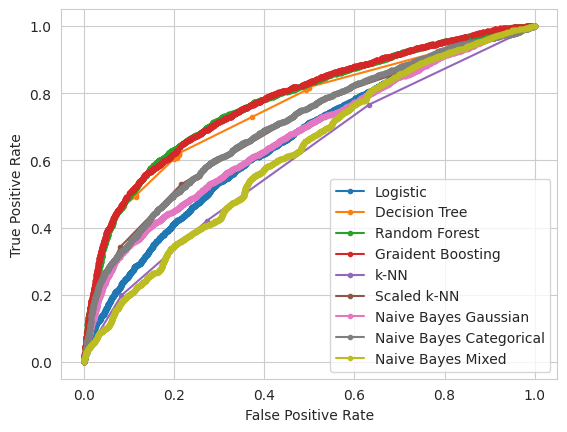

In [ ]:
df_onehot = pd.get_dummies(data)
X_1hot = df_onehot.loc[:, df_onehot.columns != 'def_pay']
y = data[['def_pay']]
trainX, testX, trainy, testy = train_test_split(X_1hot, y, test_size=0.3, random_state=2)

lr = LogisticRegression()
fit_model(lr, "Logistic")

dt = DecisionTreeClassifier(max_depth=5)
fit_model(dt, "Decision Tree")

rf = RandomForestClassifier(max_depth=5,n_estimators=50)
fit_model(rf, "Random Forest")

gb = GradientBoostingClassifier(max_depth=2,n_estimators=50)
fit_model(gb, "Graident Boosting")

kn = KNeighborsClassifier(n_neighbors=5)
fit_model(kn, "k-NN")

pipe_kn = Pipeline([("scaler", MinMaxScaler()), ("knr", KNeighborsClassifier(n_neighbors=5))])
fit_model(pipe_kn, "Scaled k-NN")

nb_g = GaussianNB()
fit_model(nb_g, "Naive Bayes Gaussian")


X_cat = convert_categorical(data)
trainX, testX, trainy, testy = train_test_split(X_cat, y, test_size=0.3, random_state=2)
nb_c = CategoricalNB()
fit_model(nb_c, "Naive Bayes Categorical")

'''
X = df1[:, df1.columns != 'default payment next month']
nb_mix = MixedNB(categorical_features=[1,2,3])
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=2)
#fit_model(nb_mix, "Naive Bayes Mixed")
nb_mix.fit(trainX, trainy)
#nb_mix.predict(testX)
'''

trainX, testX, trainy, testy = mixed_NaiveBayes(data)
#nb_mix = DecisionTreeClassifier(max_depth=5)
nb_mix = GaussianNB()
fit_model(nb_mix, "Naive Bayes Mixed")


pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()